**MLOPs**

Avance: Paul

Curso: TC5044 - Operaciones de aprendizaje automático

**Carga del DataSet y Exploración de los Datos**

In [38]:
# Librerias a utilizar

import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import statsmodels.api   as sm
import scipy.stats       as stats


In [39]:
# Montamos la unidad desde donde leeremos el DataSet

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# Accedemos a la ruta donde esta el set de datos

import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC5044 - Operaciones de Aprendizaje Automatico/MLOps"
os.chdir(DIR)


In [41]:
#Leemos la información del dataset en unn DataFrame de Pandas

df = pd.read_csv("data.csv")
df


,gender,C_api,C_man,E_NEds,E_Bpag,firstDay,lastDay,NEds,NDays,NActDays,...,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,weightIJ,NIJ
0,1,male,1,2,2,20170527205915,20170721044501,543,56,43,...,4,0,0,91,28,6,76,324,0.915024,978
1,0,unknown,3,3,1,20110301072441,20170731213735,2764,2345,514,...,7,0,0,100,249,183,646,1526,0.661673,477
2,1,male,1,0,2,20060907204302,20140911191722,57,2927,25,...,0,0,0,3,0,1,3,49,0.800528,664
3,1,male,1,1,2,20121003144916,20121208180528,104,67,5,...,2,0,0,20,1,2,2,78,1.027717,841
4,0,unknown,3,1,1,20070311125035,20141106121057,184,2798,27,...,0,0,0,26,10,5,24,112,0.997535,994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,1,male,3,2,2,20120227100614,20170930073013,266,2043,155,...,0,0,0,6,0,2,3,250,0.915024,978
4742,0,unknown,3,3,1,20111108054659,20170906055641,1217,2130,381,...,7,0,0,21,4,15,41,910,0.661673,477
4743,2,unknown,2,1,2,20120405102902,20170302073010,122,1793,33,...,7,0,0,8,1,0,2,111,1.027717,841
4744,2,female,3,3,2,20091014131349,20161112122730,962,2587,307,...,5,0,0,49,273,33,106,493,1.005227,817


### **Parte 1. Análisis Descriptivo**



---



In [42]:
# Resumen de los Tipos de Datos en nuestro DataSet y Nombres de Columnas

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         4746 non-null   int64  
 1   C_api          4746 non-null   object 
 2   C_man          4746 non-null   int64  
 3   E_NEds         4746 non-null   int64  
 4   E_Bpag         4746 non-null   int64  
 5   firstDay       4746 non-null   int64  
 6   lastDay        4746 non-null   int64  
 7   NEds           4746 non-null   int64  
 8   NDays          4746 non-null   int64  
 9   NActDays       4746 non-null   int64  
 10  NPages         4746 non-null   int64  
 11  NPcreated      4746 non-null   int64  
 12  pagesWomen     4746 non-null   int64  
 13  wikiprojWomen  4746 non-null   int64  
 14  ns_user        4746 non-null   int64  
 15  ns_wikipedia   4746 non-null   int64  
 16  ns_talk        4746 non-null   int64  
 17  ns_userTalk    4746 non-null   int64  
 18  ns_conte

**Tenemos en total 20 columnas númericas y 1 Categorica (C_API), aunque GENDER proviene de datos categoricos que son los Generos Analizados 0-Desconocido 1-Masculino 2-Femenino**

In [43]:
#Porcentaje de Valores Faltantes X cada columna en el DataFrame

percentDF = ((df.isna().sum() * 100) / len(df))
percentDF


,0
gender,0.0
C_api,0.0
C_man,0.0
E_NEds,0.0
E_Bpag,0.0
firstDay,0.0
lastDay,0.0
NEds,0.0
NDays,0.0
NActDays,0.0


**NO SE TIENEN VALORES NULOS EN EL DATASET**

### **Análisis de variables numéricas**



---





*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)


In [44]:
# Estadisticas Descriptivas

estadisticas = df.describe()
estadisticas


,gender,C_man,E_NEds,E_Bpag,firstDay,lastDay,NEds,NDays,NActDays,NPages,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,weightIJ,NIJ
count,4746.000000,4746.000000,4746.000000,4746.000000,4.746000e+03,4.746000e+03,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000
mean,0.737042,2.082807,1.484197,1.646228,2.009942e+13,2.015489e+13,2029.969448,2036.607880,183.162663,689.451960,43.479140,0.438896,0.439949,74.372946,74.368310,49.947745,96.081753,1521.886641,1.000000,867.148546
std,0.585355,0.964978,1.099795,1.079263,3.516337e+10,1.748104e+10,7793.300833,1336.119914,374.034481,3355.302483,297.395507,5.327440,17.832244,246.407233,560.782479,215.554281,545.025818,6099.009235,0.325763,325.933076
min,0.000000,1.000000,0.000000,0.000000,2.002011e+13,2.012010e+13,50.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.411985,297.000000
25%,0.000000,1.000000,1.000000,1.000000,2.007042e+13,2.014070e+13,95.000000,835.250000,24.000000,29.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,61.000000,0.831954,664.000000
50%,1.000000,3.000000,1.000000,2.000000,2.009121e+13,2.016072e+13,218.000000,2035.500000,53.000000,68.000000,4.000000,0.000000,0.000000,14.000000,1.000000,4.000000,5.000000,151.000000,0.997535,917.000000
75%,1.000000,3.000000,2.000000,3.000000,2.013040e+13,2.017073e+13,757.750000,3146.500000,154.000000,219.750000,14.000000,0.000000,0.000000,46.000000,8.000000,19.000000,22.000000,563.750000,1.057149,994.000000
max,2.000000,3.000000,3.000000,3.000000,2.017093e+13,2.017100e+13,153193.000000,5349.000000,3843.000000,94142.000000,13394.000000,185.000000,949.000000,6041.000000,24392.000000,4788.000000,12350.000000,115547.000000,1.865008,1596.000000


In [45]:
#*****************************************
# ASIMETRIA
#*****************************************

#La asimetría es una medida de la asimetría de una distribución.
#Este valor puede ser positivo o negativo.

#Un sesgo negativo (-) indica que la cola está en el lado izquierdo de la
# distribución, que se extiende hacia valores más negativos.

#Un sesgo positivo (+) indica que la cola está en el lado derecho de la distribución
# que se extiende hacia valores más positivos.

#Un valor de cero indica que no hay ningún sesgo en la distribución, lo que
# significa que la distribución es perfectamente simétrica.

df_wc_api = df.drop('C_api', axis=1) #Eliminamos del DataFrame la columna Categorica
df_wc_api.skew()


,0
gender,0.127060
C_man,-0.165965
E_NEds,0.012103
E_Bpag,-0.149090
firstDay,0.255300
lastDay,-0.701867
NEds,8.871857
NDays,0.098579
NActDays,4.348779
NPages,13.090183




*   Entre -0.5 y 0.5: La distribución es aproximadamente simétrica.
*   Entre -1 y -0.5 o entre 0.5 y 1: La distribución está moderadamente sesgada.
*   Menor a -1 o mayor a 1: La distribución está altamente sesgada

**NO SE REALIZA ESTRATEGIA DE IMPUTACION POR QUE NO HAY VALORES NULOS**

In [46]:
#*****************************************
# CURTOSIS
#*****************************************

# La curtosis es una medida de si una distribución es de cola gruesa o de cola
# ligera en relación con una distribución normal

# Si una distribución dada tiene una curtosis menor que 0, se dice que es
#    platicurtica, lo que significa que tiende a producir menos valores atípicos
#    y menos extremos que la distribución normal

# Si una distribución dada tiene una curtosis mayor que 0, se dice que es
#    leptocúrtica , lo que significa que tiende a producir más valores atípicos
#    que la distribución normal

# Si una distribución dada tiene una curtosis = 0, se dice que es Mesocurtica
#    cerca a una distribución normal

df_wc_api.kurt()


,0
gender,-0.514496
C_man,-1.905992
E_NEds,-1.317564
E_Bpag,-1.258398
firstDay,-1.064435
lastDay,-0.924510
NEds,105.846621
NDays,-1.148037
NActDays,23.751805
NPages,251.691362


## **HISTOGRAMAS VARIABLES CUANTITATIVAS**

array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'C_man'}>,
        <Axes: title={'center': 'E_NEds'}>,
        <Axes: title={'center': 'E_Bpag'}>],
       [<Axes: title={'center': 'firstDay'}>,
        <Axes: title={'center': 'lastDay'}>,
        <Axes: title={'center': 'NEds'}>,
        <Axes: title={'center': 'NDays'}>],
       [<Axes: title={'center': 'NActDays'}>,
        <Axes: title={'center': 'NPages'}>,
        <Axes: title={'center': 'NPcreated'}>,
        <Axes: title={'center': 'pagesWomen'}>],
       [<Axes: title={'center': 'wikiprojWomen'}>,
        <Axes: title={'center': 'ns_user'}>,
        <Axes: title={'center': 'ns_wikipedia'}>,
        <Axes: title={'center': 'ns_talk'}>],
       [<Axes: title={'center': 'ns_userTalk'}>,
        <Axes: title={'center': 'ns_content'}>,
        <Axes: title={'center': 'weightIJ'}>,
        <Axes: title={'center': 'NIJ'}>]], dtype=object)

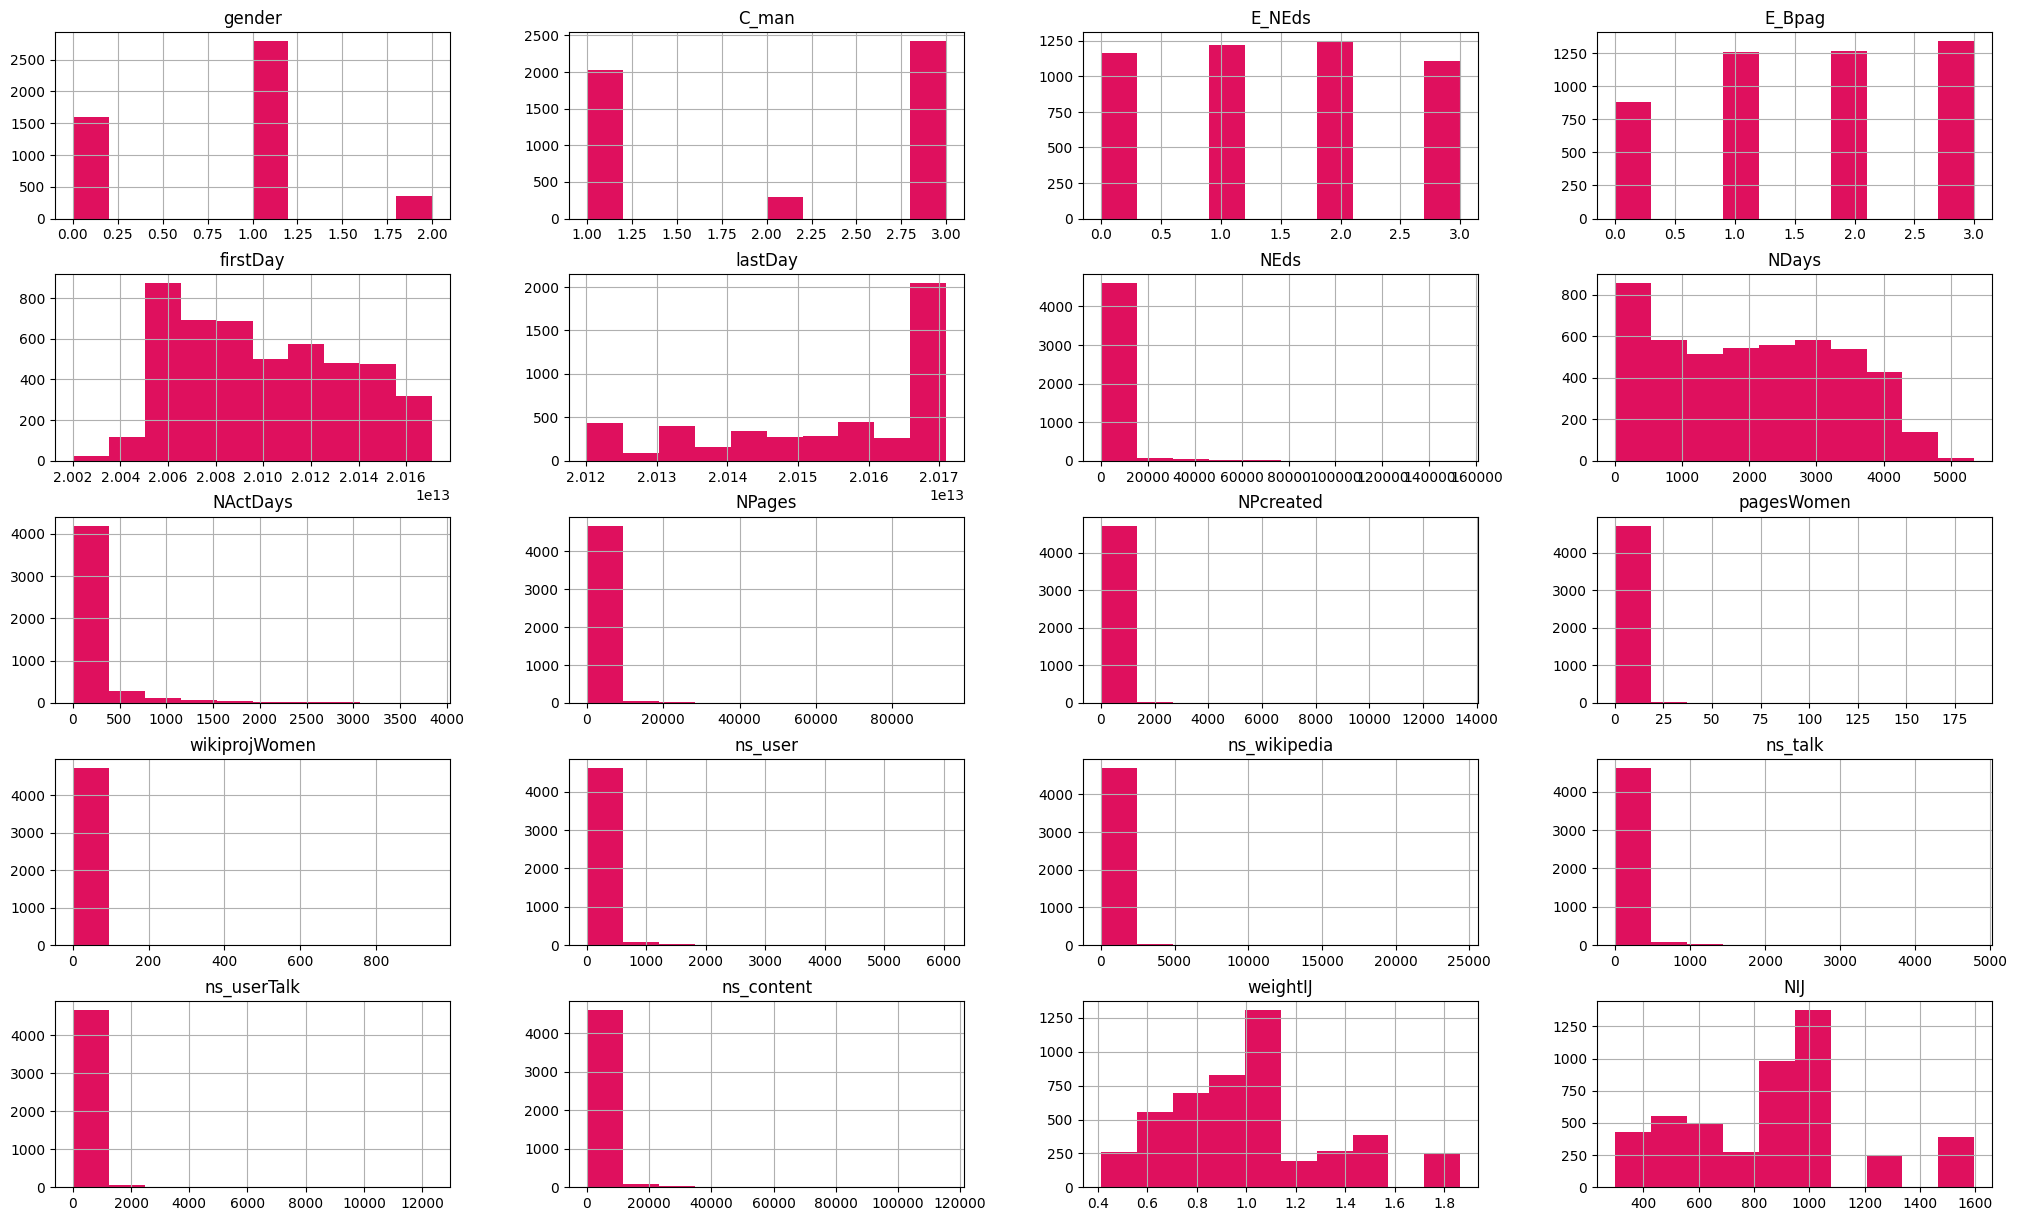

In [47]:
#Histogramas sin curva KDE
df.hist(figsize=(25,15),  color = '#DF105E')

## **BOXPLOTS VARIABLES CUANTITATIVAS**

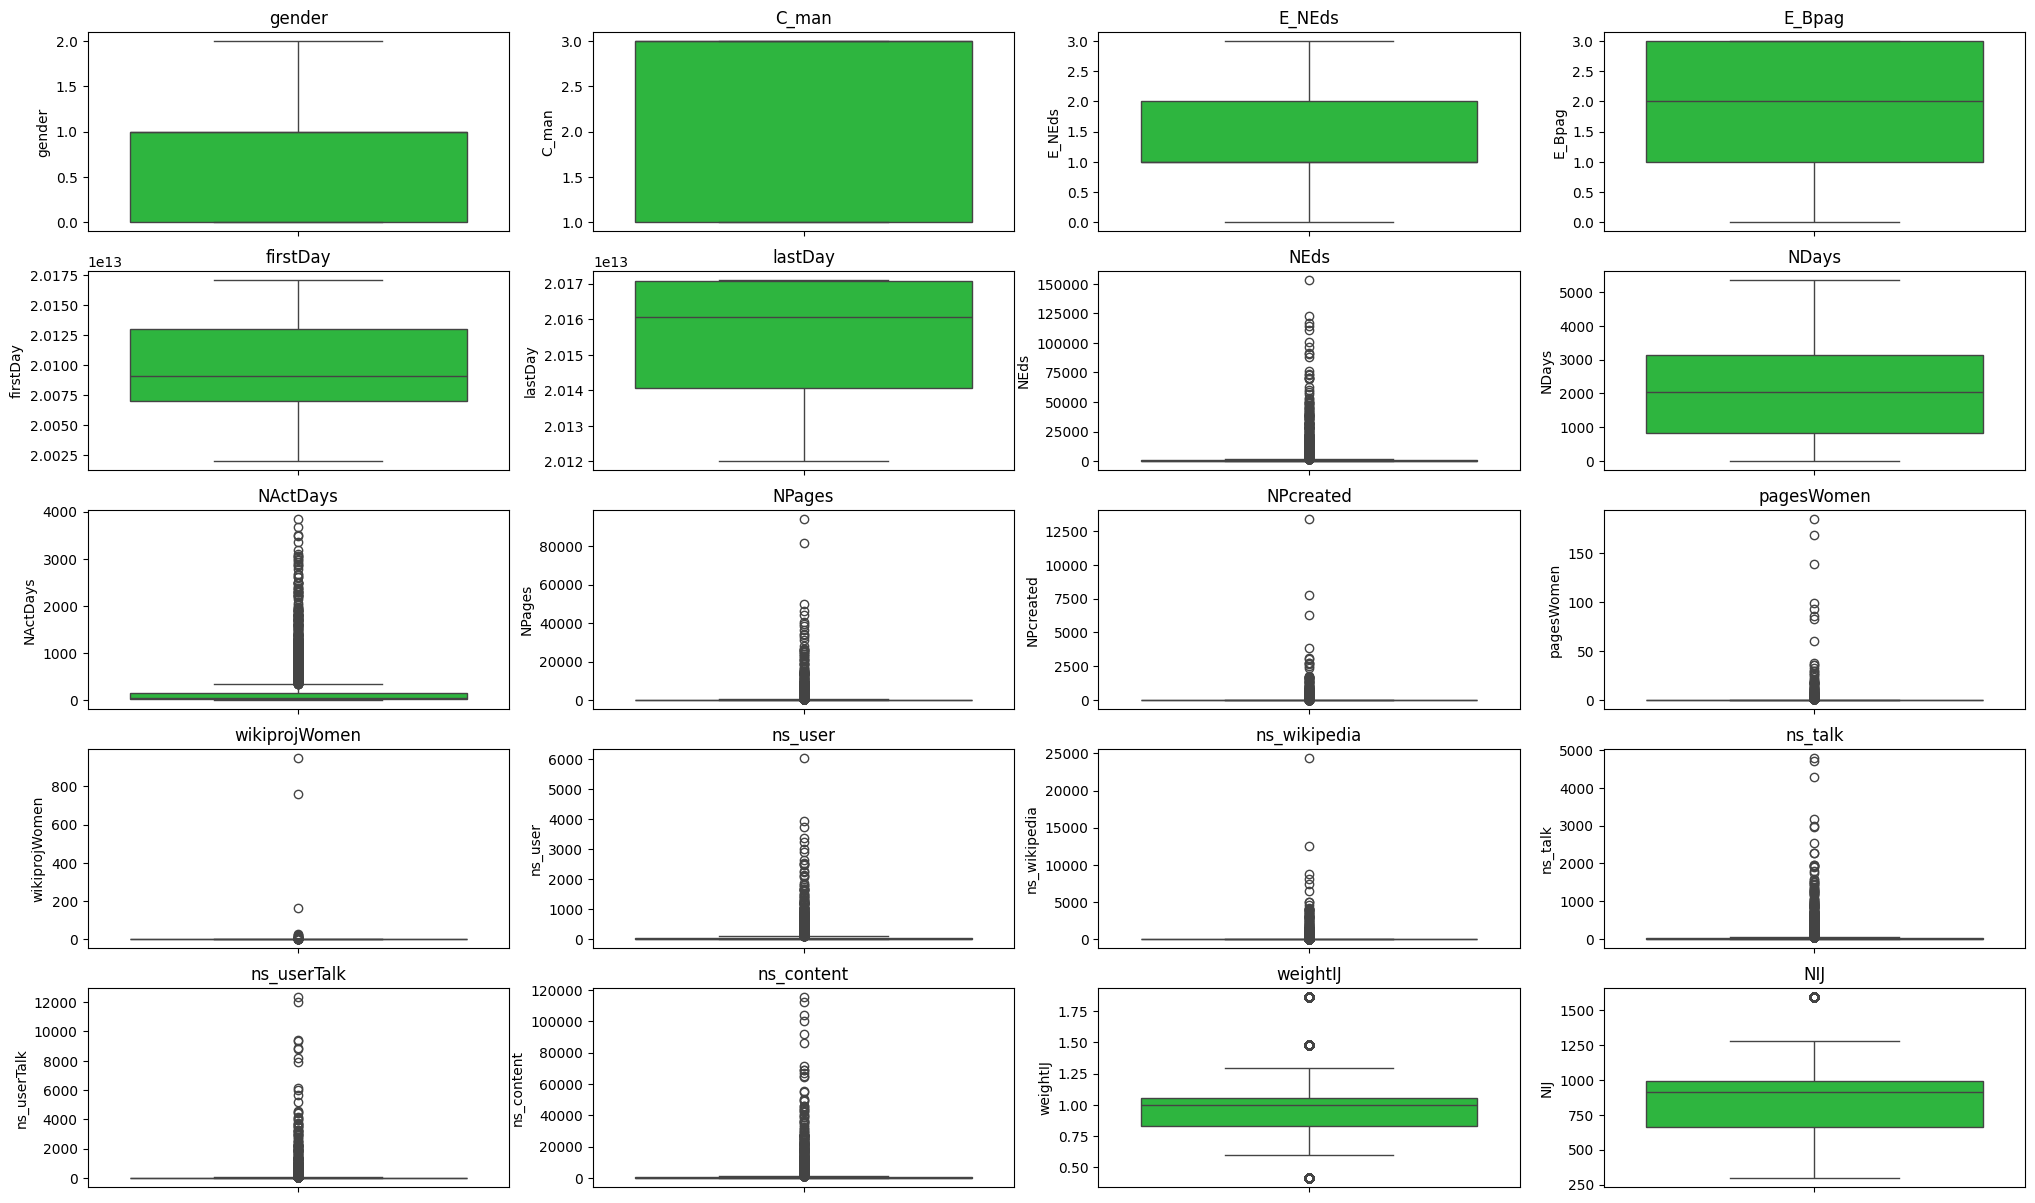

In [48]:
#Boxplots para mostrar la distribución de los datos a través de sus cuartiles

#Los BP Ofrecen un panorama de la distribución de dichos valores a traves de sus
#cuartiles, para ello utilizan como representación una caja y segmentos
#(bigotes) que delimitan los intervalos donde la variable continua concentra
#la mayoria de las observaciones.

fig, axs = plt.subplots(5,4,figsize=(25,15))
axs = axs.ravel()

for col, ax in zip(df_wc_api.columns, axs):
  sns.boxplot(df_wc_api[col], ax=ax, color='#18CB2E')
  ax.set(title=f'{col}',xlabel=None)


## **SIN OUTLIERS**


---



In [49]:
#******************************************
# OUTLIERS PARA GENDER
#******************************************

# Calculamos el rango Intercuartilico
Q1 = df['gender'].quantile(0.25)
Q3 = df['gender'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outliers_gender = df[(df['gender'] < lower) | (df['gender'] > upper)]
print(f'Numero de Outliers para Gender:" {len(outliers_gender)}')

#Porcentaje que representa
total = len(df)
print(f'Porcentaje que representan:" {(len(outliers_gender) * 100) / total}')


Numero de Outliers para Gender:" 0
Porcentaje que representan:" 0.0


In [50]:
#******************************************
# OUTLIERS PARA C_MAN
#******************************************

# Calculamos el rango Intercuartilico
Q1 = df['C_man'].quantile(0.25)
Q3 = df['C_man'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outliers_C_man = df[(df['C_man'] < lower) | (df['C_man'] > upper)]
print(f'Numero de Outliers para C_man:" {len(outliers_C_man)}')

#Porcentaje que representa
total = len(df)
print(f'Porcentaje que representan:" {(len(outliers_C_man) * 100) / total}')



Numero de Outliers para C_man:" 0
Porcentaje que representan:" 0.0


In [51]:
#******************************************
# OUTLIERS PARA E_NEds
#******************************************

# Calculamos el rango Intercuartilico
Q1 = df['E_NEds'].quantile(0.25)
Q3 = df['E_NEds'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outliers_E_NEds = df[(df['E_NEds'] < lower) | (df['E_NEds'] > upper)]
print(f'Numero de Outliers para E_NEds:" {len(outliers_E_NEds)}')

#Porcentaje que representa
total = len(df)
print(f'Porcentaje que representan:" {(len(outliers_E_NEds) * 100) / total}')

Numero de Outliers para E_NEds:" 0
Porcentaje que representan:" 0.0


In [52]:
#******************************************
# OUTLIERS PARA E_Bpag
#******************************************

# Calculamos el rango Intercuartilico
Q1 = df['E_Bpag'].quantile(0.25)
Q3 = df['E_Bpag'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outliers_E_Bpag = df[(df['E_Bpag'] < lower) | (df['E_Bpag'] > upper)]
print(f'Numero de Outliers para E_Bpag:" {len(outliers_E_Bpag)}')

#Porcentaje que representa
total = len(df)
print(f'Porcentaje que representan:" {(len(outliers_E_Bpag) * 100) / total}')

Numero de Outliers para E_Bpag:" 0
Porcentaje que representan:" 0.0


In [53]:
#******************************************
# OUTLIERS PARA firstDay
#******************************************

# Calculamos el rango Intercuartilico
Q1 = df['firstDay'].quantile(0.25)
Q3 = df['firstDay'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outliers_firstDay = df[(df['firstDay'] < lower) | (df['firstDay'] > upper)]
print(f'Numero de Outliers para firstDay:" {len(outliers_firstDay)}')

#Porcentaje que representa
total = len(df)
print(f'Porcentaje que representan:" {(len(outliers_firstDay) * 100) / total}')

Numero de Outliers para firstDay:" 0
Porcentaje que representan:" 0.0


In [54]:
#******************************************
# OUTLIERS PARA lastDay
#******************************************

# Calculamos el rango Intercuartilico
Q1 = df['lastDay'].quantile(0.25)
Q3 = df['lastDay'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outliers_lastDay = df[(df['lastDay'] < lower) | (df['lastDay'] > upper)]
print(f'Numero de Outliers para lastDay:" {len(outliers_lastDay)}')

#Porcentaje que representa
total = len(df)
print(f'Porcentaje que representan:" {(len(outliers_lastDay) * 100) / total}')

Numero de Outliers para lastDay:" 0
Porcentaje que representan:" 0.0


In [55]:
#******************************************
# OUTLIERS PARA NDays
#******************************************

# Calculamos el rango Intercuartilico
Q1 = df['NDays'].quantile(0.25)
Q3 = df['NDays'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outliers_NDays = df[(df['NDays'] < lower) | (df['NDays'] > upper)]
print(f'Numero de Outliers para NDays:" {len(outliers_NDays)}')

#Porcentaje que representa
total = len(df)
print(f'Porcentaje que representan:" {(len(outliers_NDays) * 100) / total}')

Numero de Outliers para NDays:" 0
Porcentaje que representan:" 0.0


## **CON OUTLIERS**


---



In [56]:
#******************************************
# OUTLIERS PARA NEds
#******************************************

# Calculamos el rango Intercuartilico
Q1 = df['NEds'].quantile(0.25)
Q3 = df['NEds'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outliers_NEds = df[(df['NEds'] < lower) | (df['NEds'] > upper)]
print(f'Numero de Outliers para NEds:" {len(outliers_NEds)}')

#Porcentaje que representa
total = len(df)
print(f'Porcentaje que representan:" {(len(outliers_NEds) * 100) / total}')

Numero de Outliers para NEds:" 720
Porcentaje que representan:" 15.170670037926675


In [57]:
#******************************************
# OUTLIERS PARA NActDays
#******************************************

# Calculamos el rango Intercuartilico
Q1 = df['NActDays'].quantile(0.25)
Q3 = df['NActDays'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outliers_NActDays = df[(df['NActDays'] < lower) | (df['NActDays'] > upper)]
print(f'Numero de Outliers para NActDays:" {len(outliers_NActDays)}')

#Porcentaje que representa
total = len(df)
print(f'Porcentaje que representan:" {(len(outliers_NActDays) * 100) / total}')

Numero de Outliers para NActDays:" 600
Porcentaje que representan:" 12.642225031605562


In [58]:
#******************************************
# OUTLIERS PARA NPages
#******************************************

# Calculamos el rango Intercuartilico
Q1 = df['NPages'].quantile(0.25)
Q3 = df['NPages'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outliers_NPages = df[(df['NPages'] < lower) | (df['NPages'] > upper)]
print(f'Numero de Outliers para NPages:" {len(outliers_NPages)}')

#Porcentaje que representa
total = len(df)
print(f'Porcentaje que representan:" {(len(outliers_NPages) * 100) / total}')

Numero de Outliers para NPages:" 694
Porcentaje que representan:" 14.6228402865571


In [59]:
#******************************************
# OUTLIERS PARA NPcreated
#******************************************

# Calculamos el rango Intercuartilico
Q1 = df['NPcreated'].quantile(0.25)
Q3 = df['NPcreated'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outliers_NPcreated = df[(df['NPcreated'] < lower) | (df['NPcreated'] > upper)]
print(f'Numero de Outliers para NPcreated:" {len(outliers_NPcreated)}')

#Porcentaje que representa
total = len(df)
print(f'Porcentaje que representan:" {(len(outliers_NPcreated) * 100) / total}')

Numero de Outliers para NPcreated:" 689
Porcentaje que representan:" 14.517488411293721


In [60]:
#******************************************
# OUTLIERS PARA pagesWomen
#******************************************

# Calculamos el rango Intercuartilico
Q1 = df['pagesWomen'].quantile(0.25)
Q3 = df['pagesWomen'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outliers_pagesWomen = df[(df['pagesWomen'] < lower) | (df['pagesWomen'] > upper)]
print(f'Numero de Outliers para pagesWomen:" {len(outliers_pagesWomen)}')

#Porcentaje que representa
total = len(df)
print(f'Porcentaje que representan:" {(len(outliers_pagesWomen) * 100) / total}')

Numero de Outliers para pagesWomen:" 256
Porcentaje que representan:" 5.39401601348504


In [61]:
#******************************************
# OUTLIERS PARA wikiprojWomen
#******************************************

# Calculamos el rango Intercuartilico
Q1 = df['wikiprojWomen'].quantile(0.25)
Q3 = df['wikiprojWomen'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outliers_wikiprojWomen = df[(df['wikiprojWomen'] < lower) | (df['wikiprojWomen'] > upper)]
print(f'Numero de Outliers para wikiprojWomen:" {len(outliers_wikiprojWomen)}')

#Porcentaje que representa
total = len(df)
print(f'Porcentaje que representan:" {(len(outliers_wikiprojWomen) * 100) / total}')

Numero de Outliers para wikiprojWomen:" 55
Porcentaje que representan:" 1.1588706278971765


In [62]:
#******************************************
# OUTLIERS PARA ns_user
#******************************************

# Calculamos el rango Intercuartilico
Q1 = df['ns_user'].quantile(0.25)
Q3 = df['ns_user'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outliers_ns_user = df[(df['ns_user'] < lower) | (df['ns_user'] > upper)]
print(f'Numero de Outliers para ns_user:" {len(outliers_ns_user)}')

#Porcentaje que representa
total = len(df)
print(f'Porcentaje que representan:" {(len(outliers_ns_user) * 100) / total}')

Numero de Outliers para ns_user:" 599
Porcentaje que representan:" 12.621154656552887


In [63]:
#******************************************
# OUTLIERS PARA ns_wikipedia
#******************************************

# Calculamos el rango Intercuartilico
Q1 = df['ns_wikipedia'].quantile(0.25)
Q3 = df['ns_wikipedia'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outliers_ns_wikipedia = df[(df['ns_wikipedia'] < lower) | (df['ns_wikipedia'] > upper)]
print(f'Numero de Outliers para ns_wikipedia:" {len(outliers_ns_wikipedia)}')

#Porcentaje que representa
total = len(df)
print(f'Porcentaje que representan:" {(len(outliers_ns_wikipedia) * 100) / total}')

Numero de Outliers para ns_wikipedia:" 761
Porcentaje que representan:" 16.034555415086388


In [64]:
#******************************************
# OUTLIERS PARA ns_talk
#******************************************

# Calculamos el rango Intercuartilico
Q1 = df['ns_talk'].quantile(0.25)
Q3 = df['ns_talk'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outliers_ns_talk = df[(df['ns_talk'] < lower) | (df['ns_talk'] > upper)]
print(f'Numero de Outliers para ns_talk:" {len(outliers_ns_talk)}')

#Porcentaje que representa
total = len(df)
print(f'Porcentaje que representan:" {(len(outliers_ns_talk) * 100) / total}')

Numero de Outliers para ns_talk:" 675
Porcentaje que representan:" 14.222503160556258


In [65]:
#******************************************
# OUTLIERS PARA ns_userTalk
#******************************************

# Calculamos el rango Intercuartilico
Q1 = df['ns_userTalk'].quantile(0.25)
Q3 = df['ns_userTalk'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outliers_ns_userTalk = df[(df['ns_userTalk'] < lower) | (df['ns_userTalk'] > upper)]
print(f'Numero de Outliers para ns_userTalk:" {len(outliers_ns_userTalk)}')

#Porcentaje que representa
total = len(df)
print(f'Porcentaje que representan:" {(len(outliers_ns_userTalk) * 100) / total}')

Numero de Outliers para ns_userTalk:" 690
Porcentaje que representan:" 14.538558786346396


In [66]:
#******************************************
# OUTLIERS PARA ns_content
#******************************************

# Calculamos el rango Intercuartilico
Q1 = df['ns_content'].quantile(0.25)
Q3 = df['ns_content'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outliers_ns_content = df[(df['ns_content'] < lower) | (df['ns_content'] > upper)]
print(f'Numero de Outliers para ns_content:" {len(outliers_ns_content)}')

#Porcentaje que representa
total = len(df)
print(f'Porcentaje que representan:" {(len(outliers_ns_content) * 100) / total}')

Numero de Outliers para ns_content:" 730
Porcentaje que representan:" 15.381373788453434


In [67]:
#******************************************
# OUTLIERS PARA weightIJ
#******************************************

# Calculamos el rango Intercuartilico
Q1 = df['weightIJ'].quantile(0.25)
Q3 = df['weightIJ'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outliers_weightIJ = df[(df['weightIJ'] < lower) | (df['weightIJ'] > upper)]
print(f'Numero de Outliers para weightIJ:" {len(outliers_weightIJ)}')

#Porcentaje que representa
total = len(df)
print(f'Porcentaje que representan:" {(len(outliers_weightIJ) * 100) / total}')

Numero de Outliers para weightIJ:" 892
Porcentaje que representan:" 18.794774546986936


In [68]:
#******************************************
# OUTLIERS PARA NIJ
#******************************************

# Calculamos el rango Intercuartilico
Q1 = df['NIJ'].quantile(0.25)
Q3 = df['NIJ'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outliers_NIJ = df[(df['NIJ'] < lower) | (df['NIJ'] > upper)]
print(f'Numero de Outliers para NIJ:" {len(outliers_NIJ)}')

#Porcentaje que representa
total = len(df)
print(f'Porcentaje que representan:" {(len(outliers_NIJ) * 100) / total}')

Numero de Outliers para NIJ:" 387
Porcentaje que representan:" 8.154235145385588


## **Análisis de variables de texto**



*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)



In [69]:
#Genero

df.describe(include= 'object')

,C_api
count,4746
unique,3
top,unknown
freq,2904


In [70]:
# TOP = MODA -> Valor que aparece con mayor frecuencia
import statistics
modepho = statistics.mode(df['C_api'])
modepho

'unknown'

In [71]:
# UNIQUE = CARDINALIDAD -> Cantidad de valores unicos (3)
unicospho = df['C_api'].unique()
print(unicospho)
countpho = df['C_api'].nunique()
print(countpho)

['male' 'unknown' 'female']
3


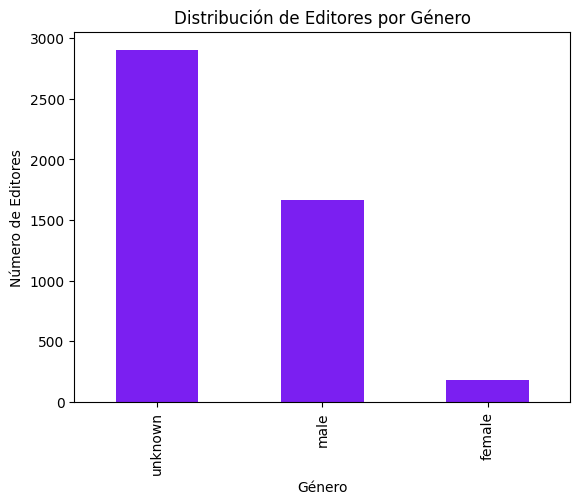

In [84]:
# FREQ = Recuentos únicos -> Número de ocurrencias para cada valor único
conteo = df['C_api'].value_counts()
conteo.plot(kind='bar', color='#7B1FF1')
plt.title('Distribución de Editores por Género')
plt.xlabel('Género')
plt.ylabel('Número de Editores')
plt.show()


## **GRAFICA DE CONTEO PARA VARIABLES CATEGORICAS**

([<matplotlib.axis.XTick at 0x7e0fb80985e0>,
 [Text(0, 0, 'Desconocido'), Text(1, 0, 'Hombre'), Text(2, 0, 'Mujer')])

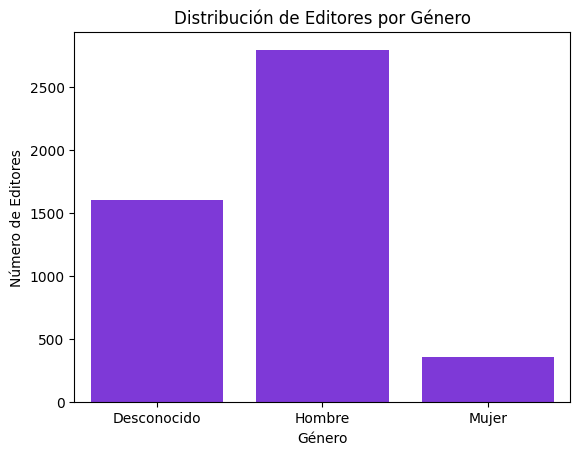

In [73]:
#GRAFICA DISTRIBUCIÓN DE EDITORES POR GENERO

sns.countplot(x='gender', data=df, color='#7B1FF1')
plt.title('Distribución de Editores por Género')
plt.xlabel('Género')
plt.ylabel('Número de Editores')
plt.xticks(ticks=[0, 1, 2], labels=['Desconocido', 'Hombre', 'Mujer'])


## **MAPA DE CALOR**

# **Se puede verificar una alta CORRELACIÓN entre las variables siguientes:**



*   firstDay y NDays -> CORRELACIÓN NEGATIVA FUERTE



<Axes: >

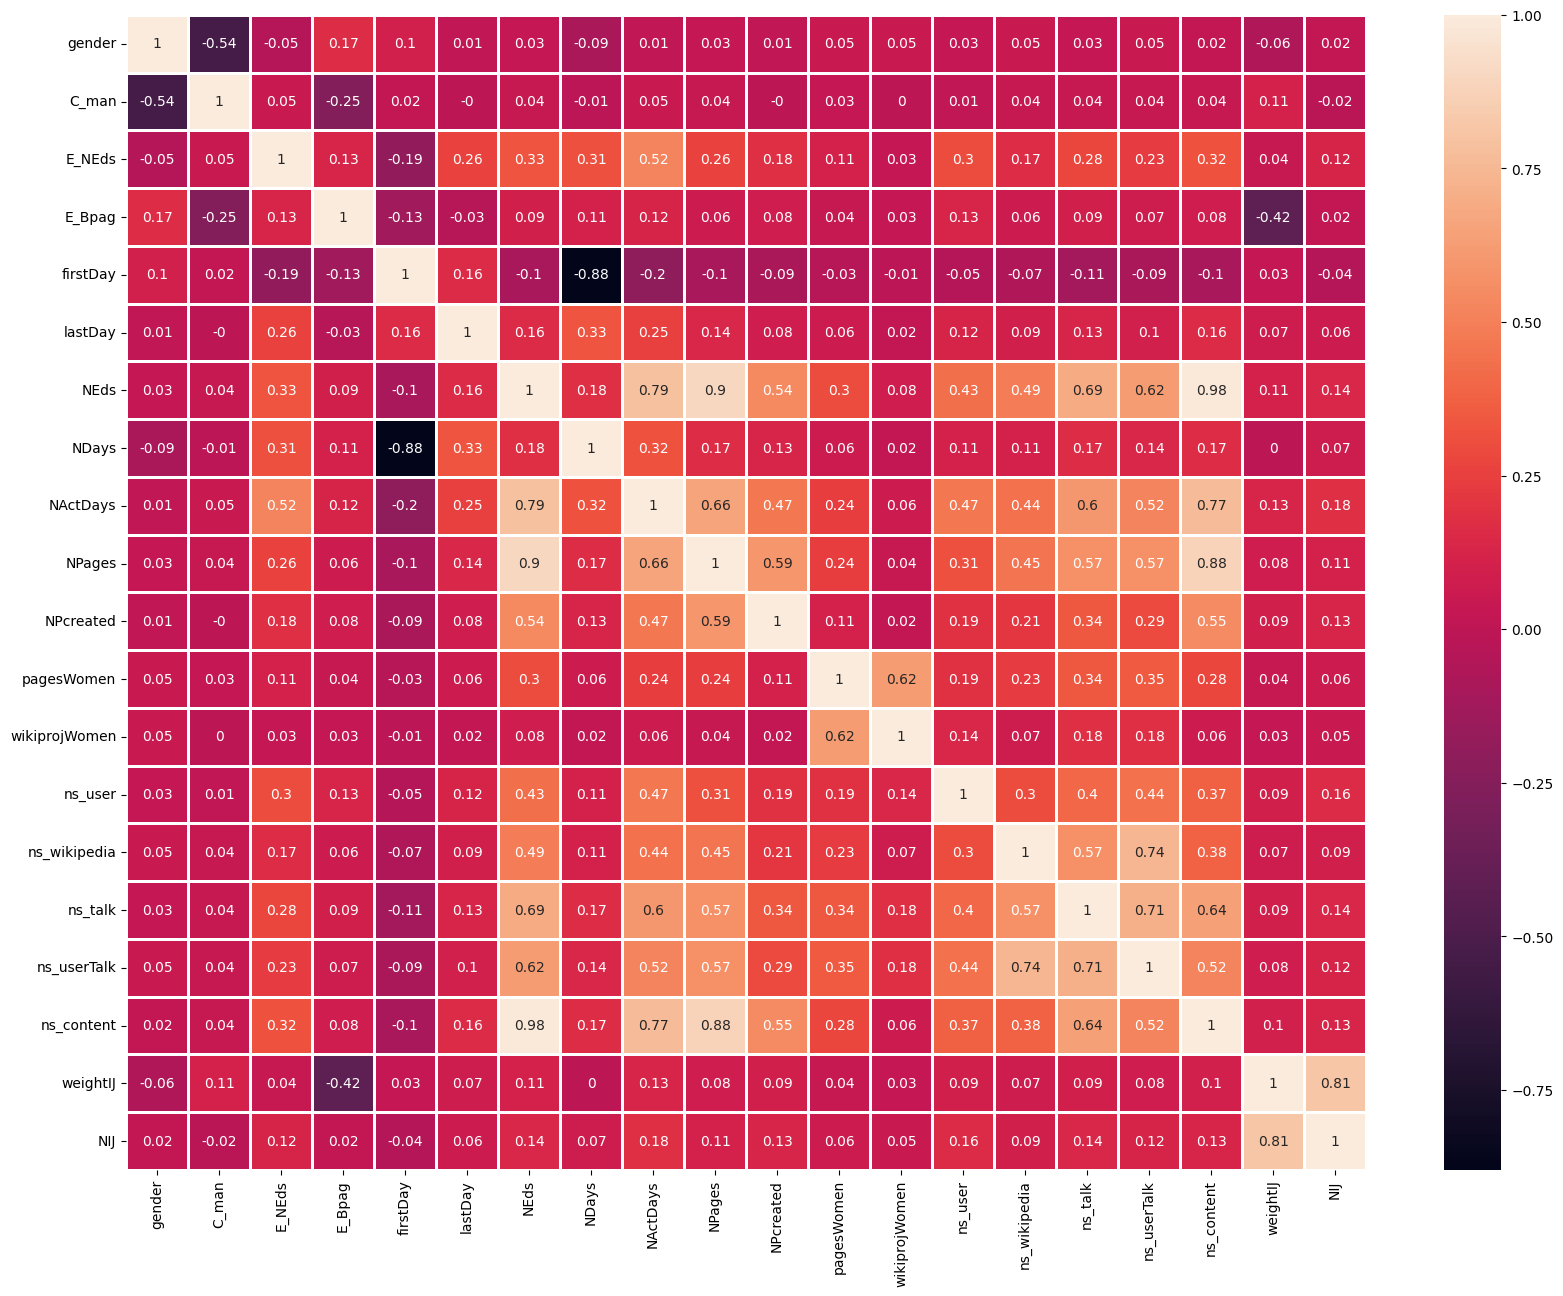

In [74]:
# Mapa de Calor

# Cuanto más alejado este el coeficiente de correlación de 0, más fuerte será la
# relación entre 2 variables


plt.figure(figsize=(20, 15))
sns.heatmap(round(df.corr(numeric_only=True),2), annot=True, linewidths = 0.75, linecolor = "white")

### **TRATAMIENTO DE OUTLIERS**


Si el conjunto de outliers es “relativamente grande” (sabemos que deben andar alrededor de un 5% del conjunto total de datos) SE DEBE:



*   Numero de Outliers para NEds:" 720
*   Porcentaje que representan:" 15.170670037926675 > 5%

*   Numero de Outliers para NActDays:" 600
*   Porcentaje que representan:" 12.642225031605562 > 5%

*   Numero de Outliers para NPages:" 694
*   Porcentaje que representan:" 14.6228402865571 > 5%

*   Numero de Outliers para NPcreated:" 689
*   Porcentaje que representan:" 14.517488411293721 > 5%

*   Numero de Outliers para pagesWomen:" 256
*   Porcentaje que representan:" 5.39401601348504 > 5%

*   Numero de Outliers para wikiprojWomen:" 55
*   Porcentaje que representan:" 1.1588706278971765 < 5%

*   Numero de Outliers para ns_user:" 599
*   Porcentaje que representan:" 12.621154656552887 > 5%

*   Numero de Outliers para ns_wikipedia:" 761
*   Porcentaje que representan:" 16.034555415086388 > 5%

*   Numero de Outliers para ns_talk:" 675
*   Porcentaje que representan:" 14.222503160556258 > 5%

*   Numero de Outliers para ns_userTalk:" 690
*   Porcentaje que representan:" 14.538558786346396 > 5%

*   Numero de Outliers para ns_content:" 730
*   Porcentaje que representan:" 15.381373788453434 > 5%

*   Numero de Outliers para weightIJ:" 892
*   Porcentaje que representan:" 18.794774546986936 > 5%

*   Numero de Outliers para NIJ:" 387
*   Porcentaje que representan:" 8.154235145385588 > 5%







### **Como podemos verificar en la información anterior:**

*   13 VARIABLES poseen OUTLIERS
*    7 VARIABLES no poseen OUTLIERS

*   De los cuales 12 variables presentan un porcentaje mayor al 5 % de los datos totales con OUTLIERS a excepción de **wikiprojWomen** por lo que:

*   Si los outliers representan más del 5% de los datos, eliminarlos podría afectar significativamente el dataset. Sería conveniente  evaluar si estos outliers son errores, datos extremos válidos o si tienen algún significado especial

### **DISTRIBUCIÓN DE LOS DATOS DE LAS VARIABLES SESGADAS CON RESPECTO A UNA DISTRIBUCIÓN NORMAL**

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).


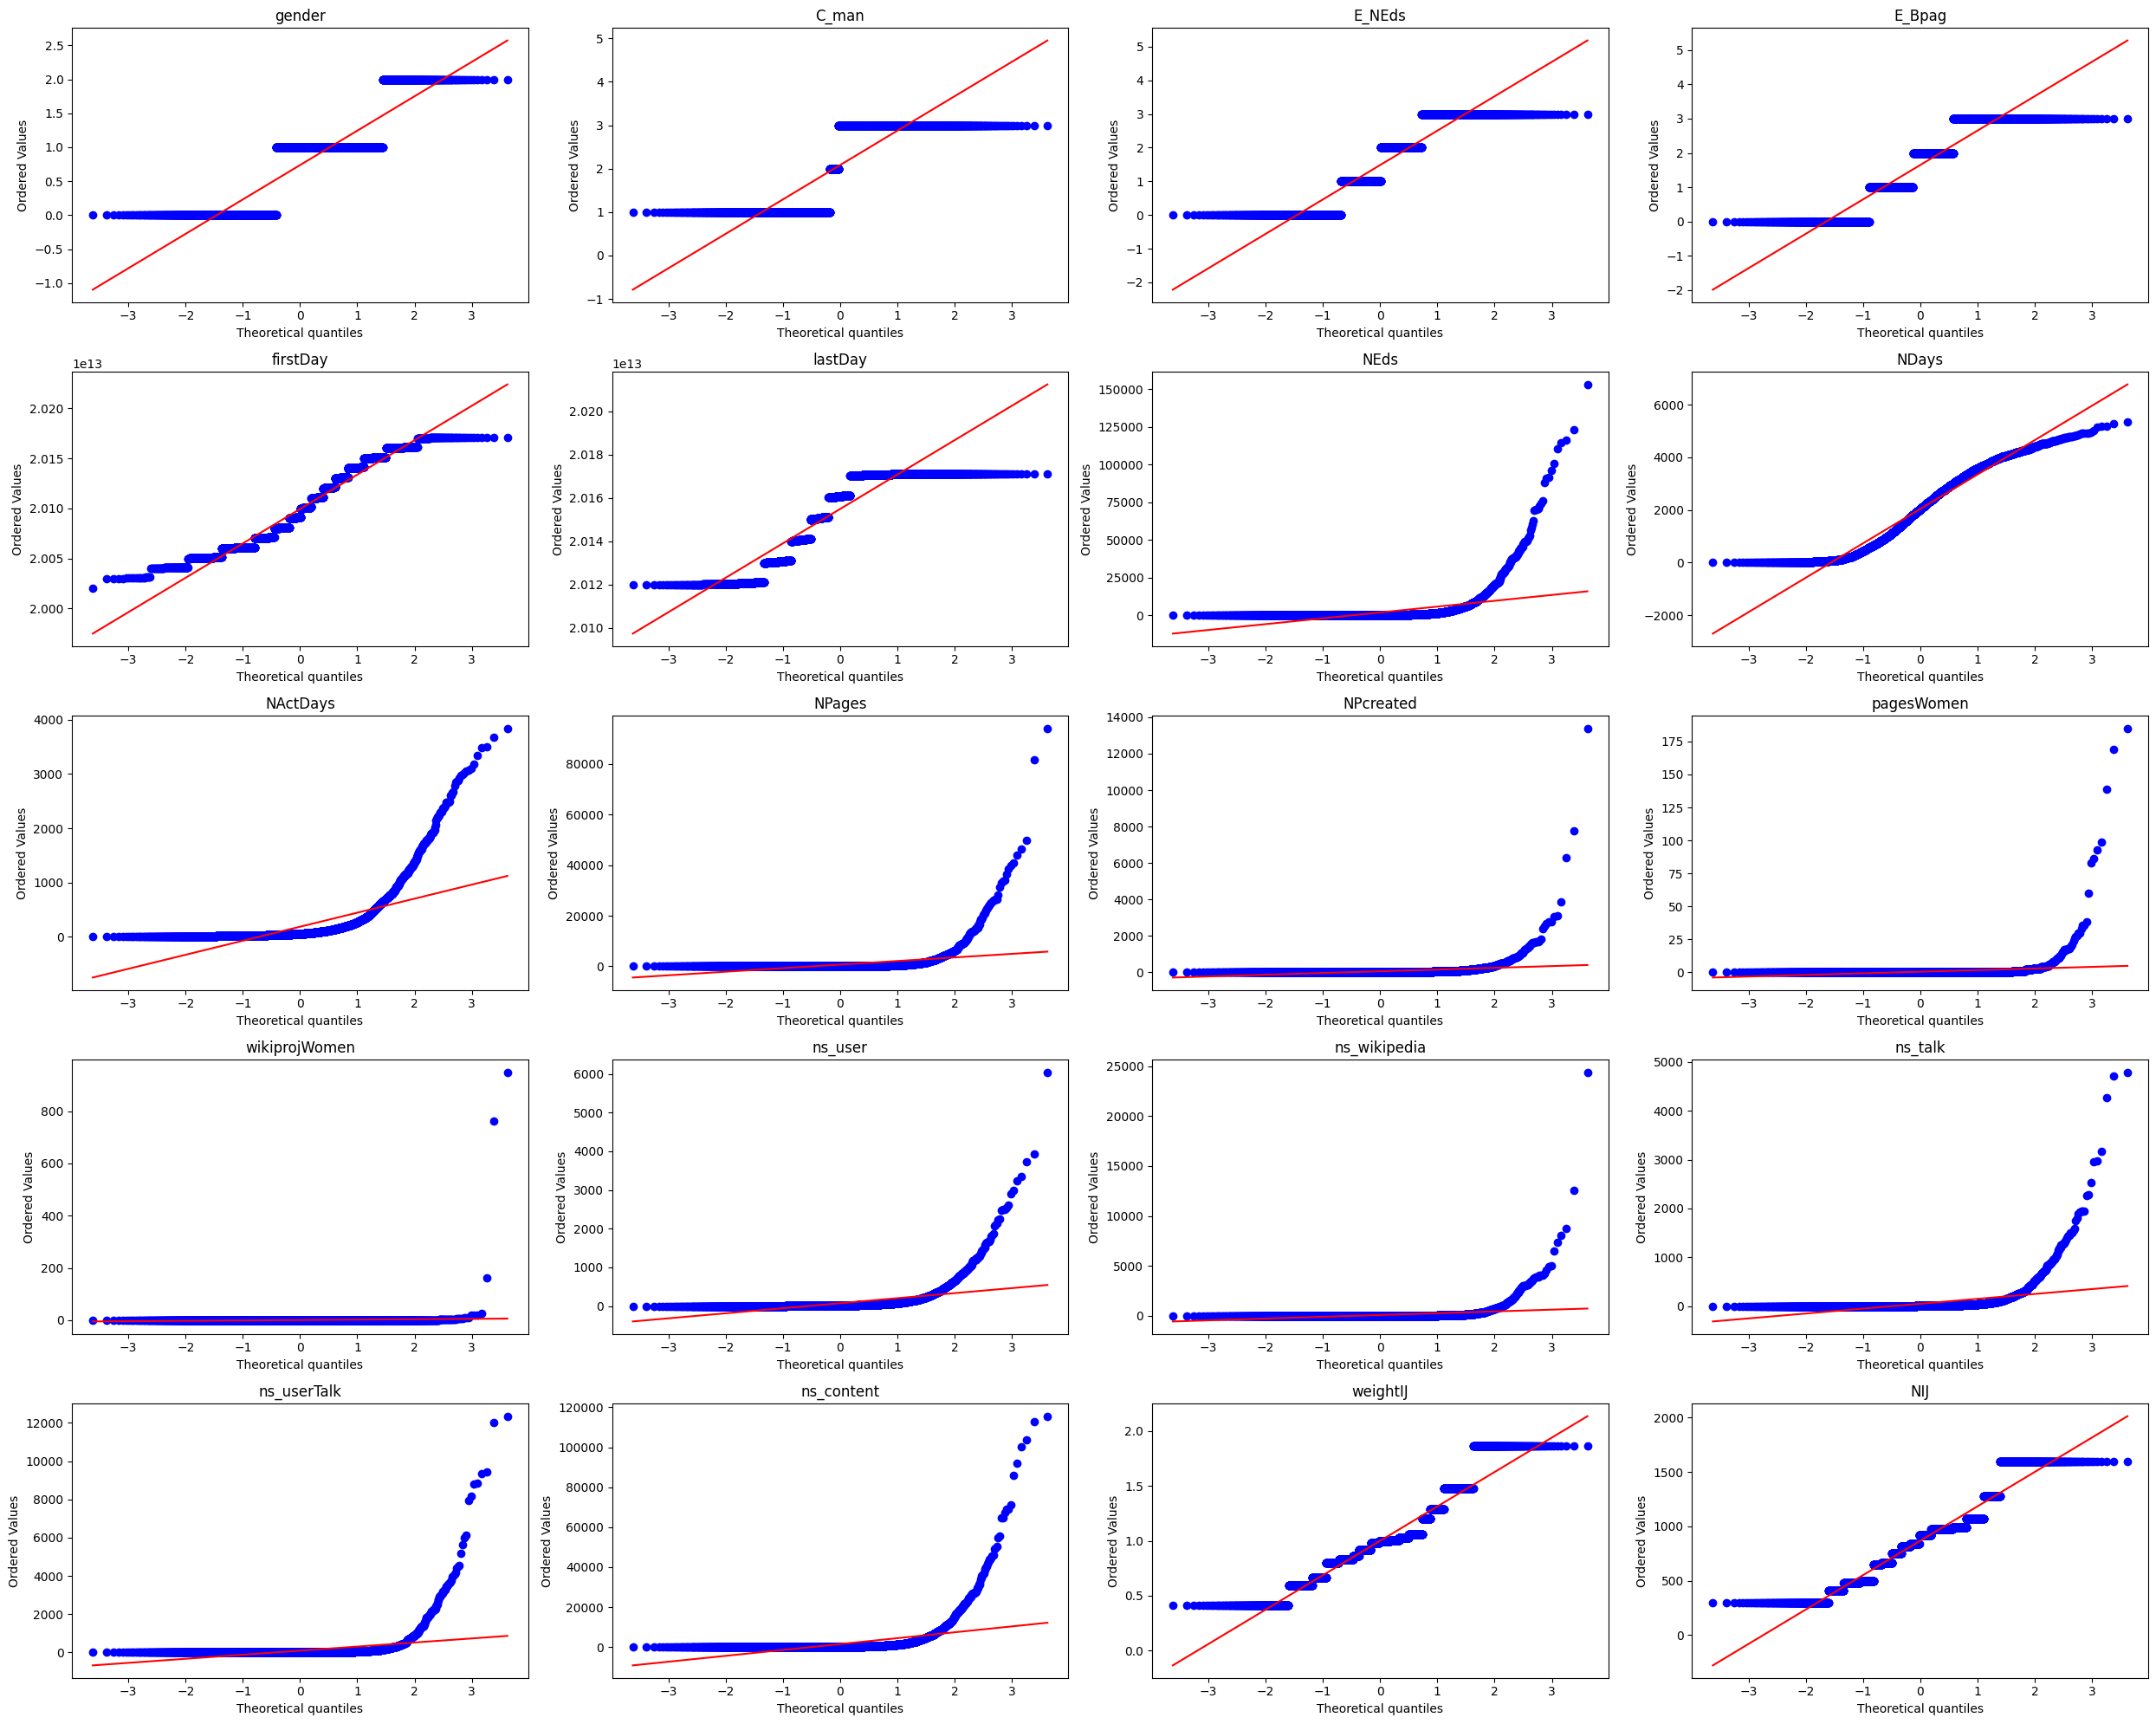

In [75]:
fig, axs = plt.subplots(5,4,figsize=(25,20))

stats.probplot(df['gender'], dist="norm", plot=axs[0, 0])
axs[0, 0].set_title('gender')
stats.probplot(df['C_man'], dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('C_man')
stats.probplot(df['E_NEds'], dist="norm", plot=axs[0, 2])
axs[0, 2].set_title('E_NEds')
stats.probplot(df['E_Bpag'], dist="norm", plot=axs[0, 3])
axs[0, 3].set_title('E_Bpag')

stats.probplot(df['firstDay'], dist="norm", plot=axs[1, 0])
axs[1, 0].set_title('firstDay')
stats.probplot(df['lastDay'], dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('lastDay')
stats.probplot(df['NEds'], dist="norm", plot=axs[1, 2])
axs[1, 2].set_title('NEds')
stats.probplot(df['NDays'], dist="norm", plot=axs[1, 3])
axs[1, 3].set_title('NDays')


stats.probplot(df['NActDays'], dist="norm", plot=axs[2, 0])
axs[2, 0].set_title('NActDays')
stats.probplot(df['NPages'], dist="norm", plot=axs[2, 1])
axs[2, 1].set_title('NPages')
stats.probplot(df['NPcreated'], dist="norm", plot=axs[2, 2])
axs[2, 2].set_title('NPcreated')
stats.probplot(df['pagesWomen'], dist="norm", plot=axs[2, 3])
axs[2, 3].set_title('pagesWomen')

stats.probplot(df['wikiprojWomen'], dist="norm", plot=axs[3, 0])
axs[3, 0].set_title('wikiprojWomen')
stats.probplot(df['ns_user'], dist="norm", plot=axs[3, 1])
axs[3, 1].set_title('ns_user')
stats.probplot(df['ns_wikipedia'], dist="norm", plot=axs[3, 2])
axs[3, 2].set_title('ns_wikipedia')
stats.probplot(df['ns_talk'], dist="norm", plot=axs[3, 3])
axs[3, 3].set_title('ns_talk')

stats.probplot(df['ns_userTalk'], dist="norm", plot=axs[4, 0])
axs[4, 0].set_title('ns_userTalk')
stats.probplot(df['ns_content'], dist="norm", plot=axs[4, 1])
axs[4, 1].set_title('ns_content')
stats.probplot(df['weightIJ'], dist="norm", plot=axs[4, 2])
axs[4, 2].set_title('weightIJ')
stats.probplot(df['NIJ'], dist="norm", plot=axs[4, 3])
axs[4, 3].set_title('NIJ')

plt.tight_layout()
plt.show()

###**Aplicaremos la transformación Yeo-Johnson para reducir el sesgo en las variables que estan ALTAMENTE SESGADAS**

*   Entre -0.5 y 0.5: La distribución es aproximadamente simétrica.
*   Entre -1 y -0.5 o entre 0.5 y 1: La distribución está moderadamente sesgada.
*   Menor a -1 o mayor a 1: La distribución está altamente sesgada



---


*   gender	      = 0.127060   -------> APROXIMADAMENTE SIMETRICA
*   C_man	        = -0.165965  -------> APROXIMADAMENTE SIMETRICA
*   E_NEds	      = 0.012103   -------> APROXIMADAMENTE SIMETRICA
*   E_Bpag	      = -0.149090  -------> APROXIMADAMENTE SIMETRICA
*   firstDay      =	0.255300   -------> APROXIMADAMENTE SIMETRICA
*   lastDay	      = -0.701867  -------> MODERADAMENTE SESGADA
*   NEds	        = 8.871857   -------> ALTAMENTE SESGADA
*   NDays	        = 0.098579   -------> APROXIMADAMENTE SIMETRICA
*   NActDays      =	4.348779   -------> ALTAMENTE SESGADA
*   NPages	      = 13.090183  -------> ALTAMENTE SESGADA
*   NPcreated	    = 26.929776  -------> ALTAMENTE SESGADA
*   pagesWomen    = 24.090361  -------> ALTAMENTE SESGADA
*   wikiprojWomen =	48.314616  -------> ALTAMENTE SESGADA
*   ns_user	      = 9.501905   -------> ALTAMENTE SESGADA
*   ns_wikipedia  = 23.506399  -------> ALTAMENTE SESGADA
*   ns_talk	      = 10.997162  -------> ALTAMENTE SESGADA
*   ns_userTalk	  = 12.517149  -------> ALTAMENTE SESGADA
*   ns_content	  = 9.698576   -------> ALTAMENTE SESGADA
*   weightIJ	    = 0.752636   -------> MODERADAMENTE SESGADA
*   NIJ	          = 0.435413   -------> APROXIMADAMENTE SIMETRICA


**YEO-JOHSON APLICA TANTO PARA VALORES NEGATIVOS COMO POSITIVOS**

In [76]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='yeo-johnson', standardize=False)
transf = transformer.fit_transform(df[['NEds','NActDays','NPages', 'NPcreated', 'pagesWomen', 'wikiprojWomen', 'ns_user', 'ns_wikipedia', 'ns_talk', 'ns_userTalk', 'ns_content']])
transf_df = pd.DataFrame(transf, columns=transformer.get_feature_names_out())
transf_df

,NEds,NActDays,NPages,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content
0,2.639516,2.990204,3.481776,1.309405,-0.0,-0.0,3.134618,1.824461,1.576235,2.834541,4.860267
1,2.794635,4.279065,3.933696,1.597433,-0.0,-0.0,3.176900,2.183304,3.071457,3.513641,5.890959
2,2.229412,2.656994,2.491987,-0.000000,-0.0,-0.0,1.232323,-0.000000,0.641860,1.200504,3.473679
3,2.369286,1.598716,2.989622,0.952725,-0.0,-0.0,2.365709,0.603247,0.973502,0.979630,3.827532
4,2.479370,2.705319,3.279194,-0.000000,-0.0,-0.0,2.510794,1.525650,1.474943,2.330273,4.097510
...,...,...,...,...,...,...,...,...,...,...,...
4741,2.540389,3.704522,3.312118,-0.000000,-0.0,-0.0,1.651741,-0.000000,0.973502,1.200504,4.678310
4742,2.726830,4.143588,3.897706,1.597433,-0.0,-0.0,2.393044,1.177780,2.063436,2.577859,5.557816
4743,2.402150,2.829745,2.778561,1.597433,-0.0,-0.0,1.827258,0.603247,-0.000000,0.979630,4.090878
4744,2.703748,4.042634,3.669643,1.425426,-0.0,-0.0,2.840890,2.192628,2.435299,2.960614,5.149021


###**VERIFICAMOS EL EFECTO DE LA TRANSFORMACIÓN**

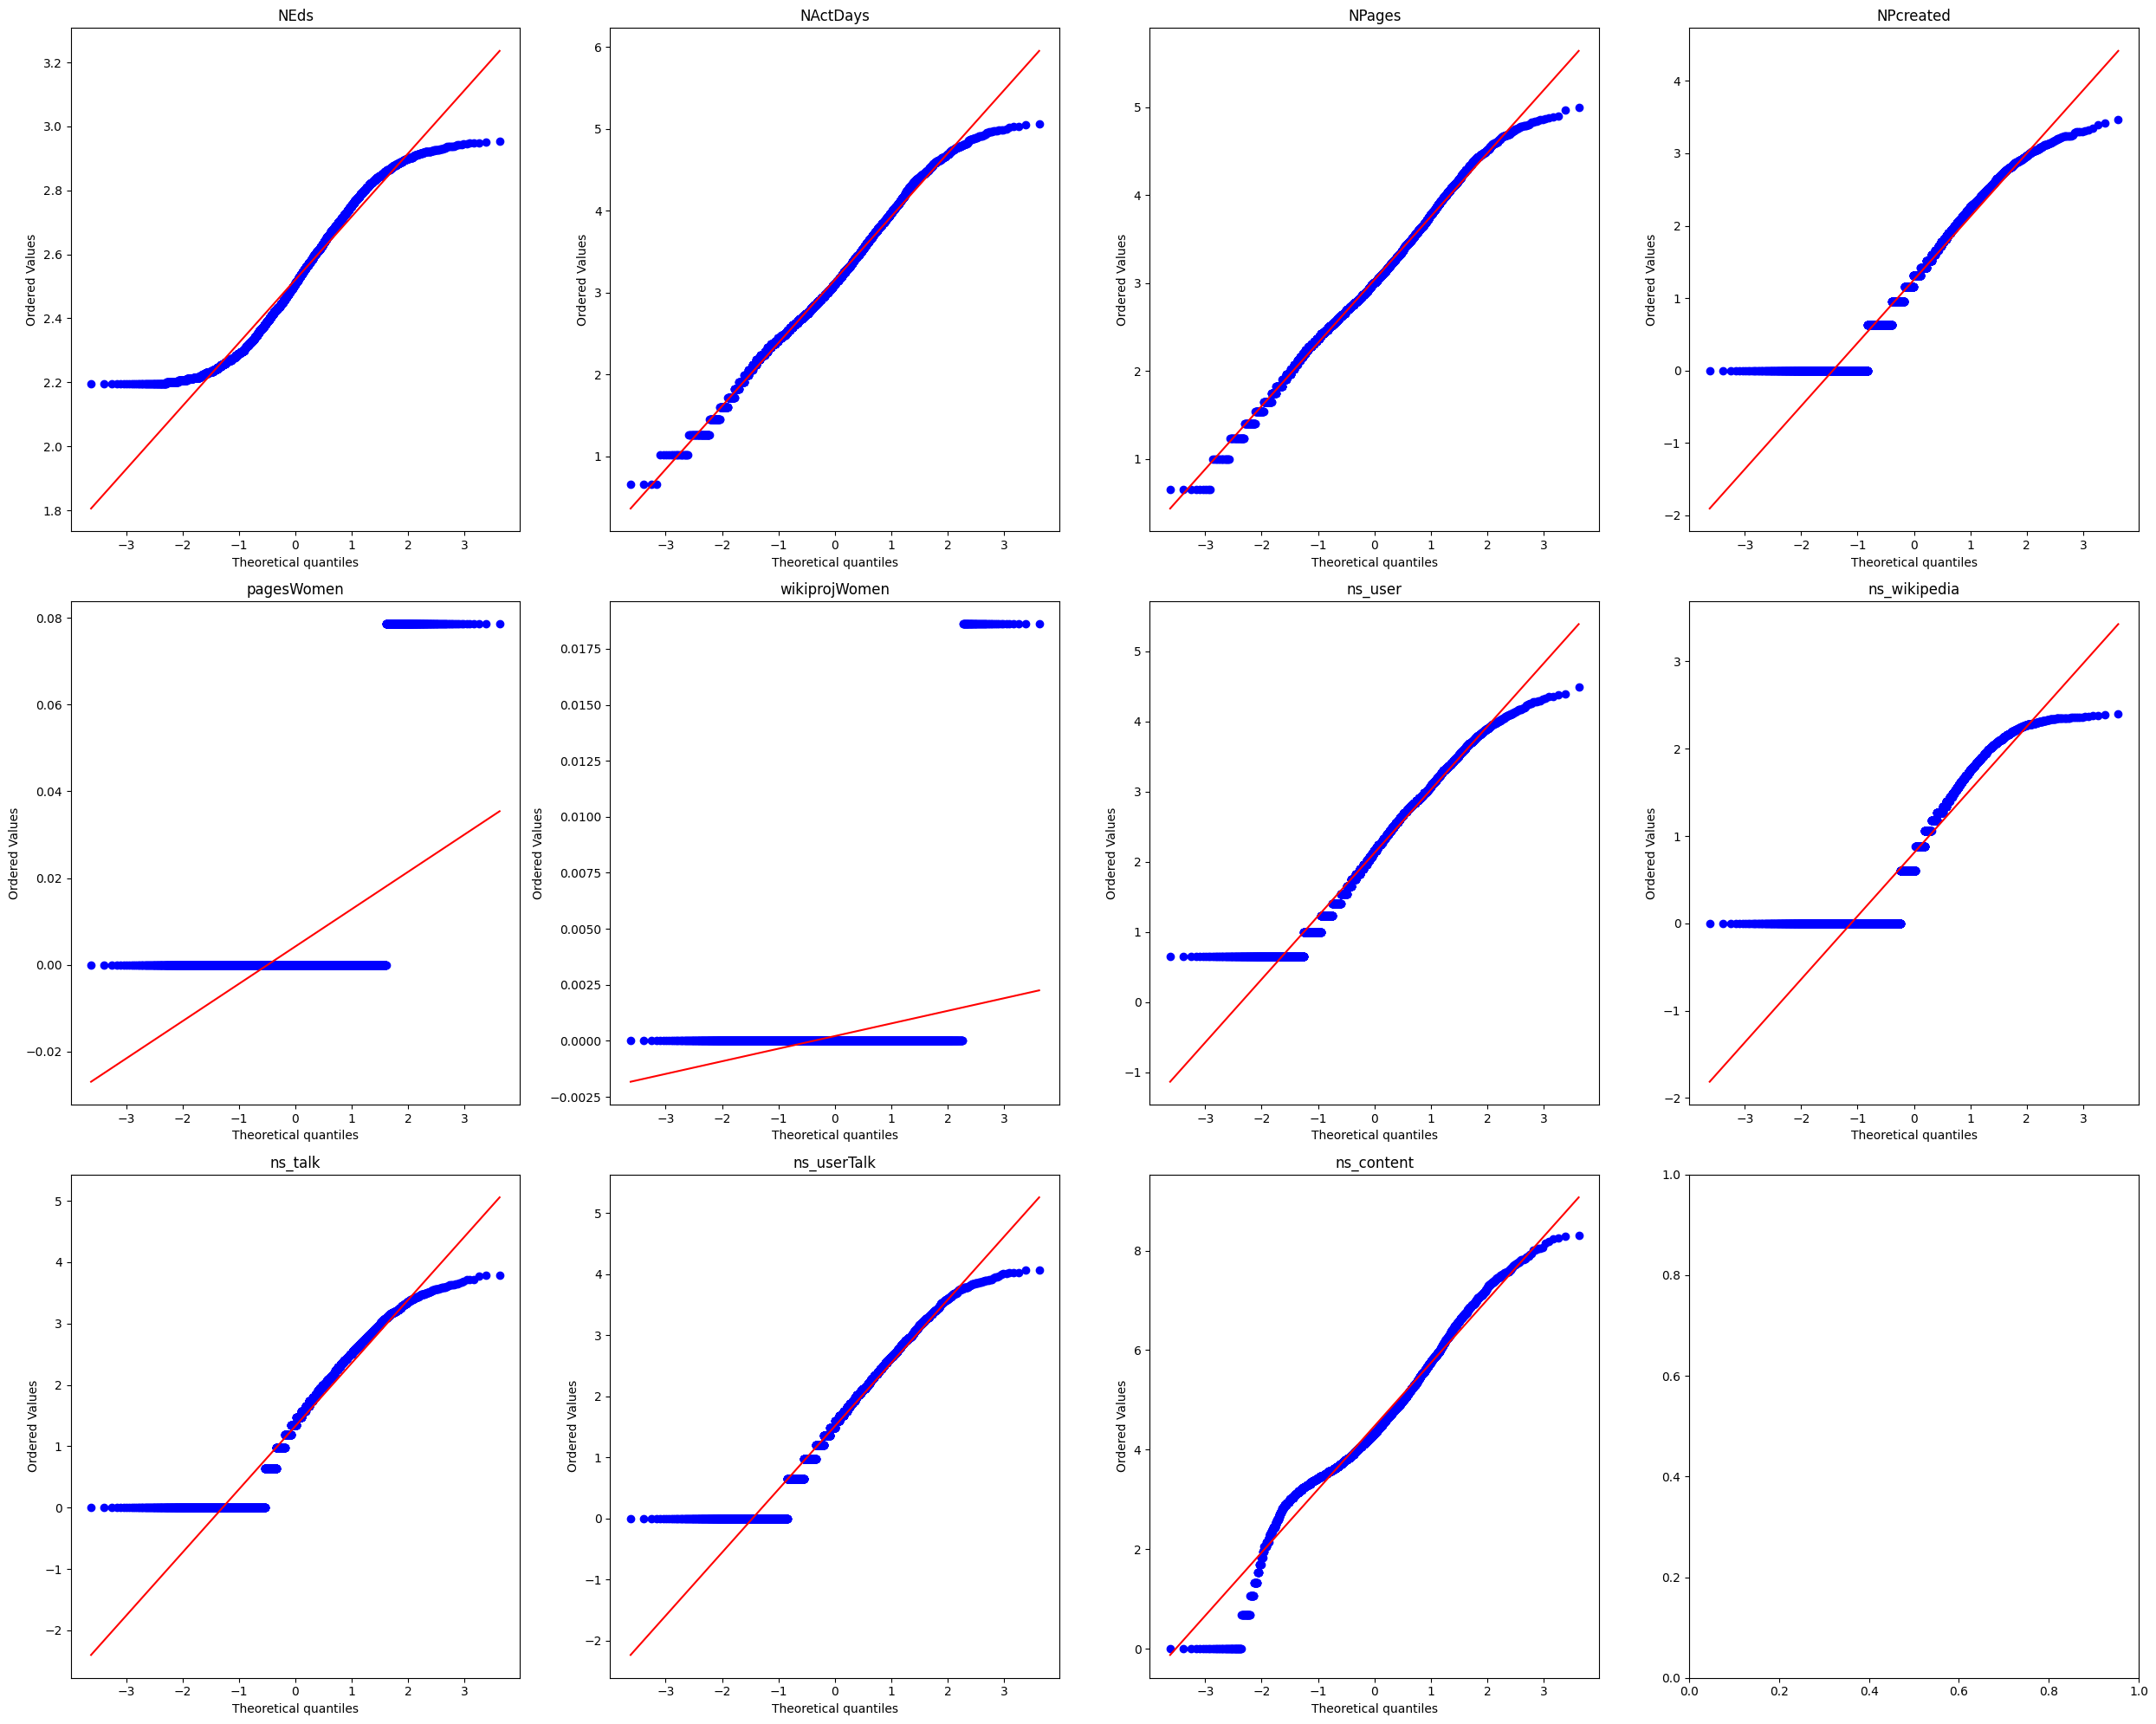

In [77]:
fig, axs = plt.subplots(3,4,figsize=(25,20))

stats.probplot(transf_df['NEds'], dist="norm", plot=axs[0, 0])
axs[0, 0].set_title('NEds')
stats.probplot(transf_df['NActDays'], dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('NActDays')
stats.probplot(transf_df['NPages'], dist="norm", plot=axs[0, 2])
axs[0, 2].set_title('NPages')
stats.probplot(transf_df['NPcreated'], dist="norm", plot=axs[0, 3])
axs[0, 3].set_title('NPcreated')
stats.probplot(transf_df['pagesWomen'], dist="norm", plot=axs[1, 0])
axs[1, 0].set_title('pagesWomen')
stats.probplot(transf_df['wikiprojWomen'], dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('wikiprojWomen')
stats.probplot(transf_df['ns_user'], dist="norm", plot=axs[1, 2])
axs[1, 2].set_title('ns_user')
stats.probplot(transf_df['ns_wikipedia'], dist="norm", plot=axs[1, 3])
axs[1, 3].set_title('ns_wikipedia')
stats.probplot(transf_df['ns_talk'], dist="norm", plot=axs[2, 0])
axs[2, 0].set_title('ns_talk')
stats.probplot(transf_df['ns_userTalk'], dist="norm", plot=axs[2, 1])
axs[2, 1].set_title('ns_userTalk')
stats.probplot(transf_df['ns_content'], dist="norm", plot=axs[2, 2])
axs[2, 2].set_title('ns_content')

plt.tight_layout()
plt.show()

### **Persistencia de Sesgo: En algunas COLUMNAS la presencia de valores repetidos y la desviación de la línea de referencia en las graficas QQ anteriores sugieren que la transformación Yeo-Johnson no ha logrado completamente normalizar la distribución**

### **ESCALAMIENTO DE VARIABLES NUMERICAS**

In [78]:
# ESCALAMIENTO:   Se estandariza el rango de las variables independientes o
#                 caracteristicas, tambien se conoce como Normalización
#                 (Z-SCORE/Estandarización/Transformación Gaussiana, Min-Max
#                 Robusto)

# Significa transformar los valores de la variable para que tengan una escala
# específica, como por ejemplo, una escala de 0 a 1
# Escalamiento de las variables numéricas sesgadas

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
minmax = scaler.fit_transform(transf_df)
minmax_df = pd.DataFrame(minmax, columns=scaler.get_feature_names_out())
minmax_df

,NEds,NActDays,NPages,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content
0,0.585348,0.528564,0.652106,0.378349,0.0,0.0,0.646108,0.761067,0.416198,0.697119,0.585614
1,0.789745,0.821281,0.756296,0.461574,0.0,0.0,0.657117,0.910757,0.811005,0.864134,0.709802
2,0.044959,0.452887,0.423911,0.000000,0.0,0.0,0.150805,0.000000,0.169480,0.295248,0.418544
3,0.229270,0.212538,0.538640,0.275287,0.0,0.0,0.445906,0.251642,0.257049,0.240927,0.461180
4,0.374325,0.463863,0.605401,0.000000,0.0,0.0,0.483683,0.636419,0.389453,0.573100,0.493709
...,...,...,...,...,...,...,...,...,...,...,...
4741,0.454730,0.690795,0.612991,0.000000,0.0,0.0,0.260010,0.000000,0.257049,0.295248,0.563690
4742,0.700399,0.790512,0.747998,0.461574,0.0,0.0,0.453024,0.491306,0.544842,0.633991,0.669662
4743,0.272574,0.492121,0.489980,0.461574,0.0,0.0,0.305710,0.251642,0.000000,0.240927,0.492910
4744,0.669984,0.767584,0.695419,0.411873,0.0,0.0,0.569630,0.914646,0.643030,0.728125,0.620406


**VERIFICAMOS LOS HISTORGRAMAS DE LAS VARIABLES QUE FUERON ESCALADAS**

array([[<Axes: title={'center': 'NEds'}>,
        <Axes: title={'center': 'NActDays'}>,
        <Axes: title={'center': 'NPages'}>],
       [<Axes: title={'center': 'NPcreated'}>,
        <Axes: title={'center': 'pagesWomen'}>,
        <Axes: title={'center': 'wikiprojWomen'}>],
       [<Axes: title={'center': 'ns_user'}>,
        <Axes: title={'center': 'ns_wikipedia'}>,
        <Axes: title={'center': 'ns_talk'}>],
       [<Axes: title={'center': 'ns_userTalk'}>,
        <Axes: title={'center': 'ns_content'}>, <Axes: >]], dtype=object)

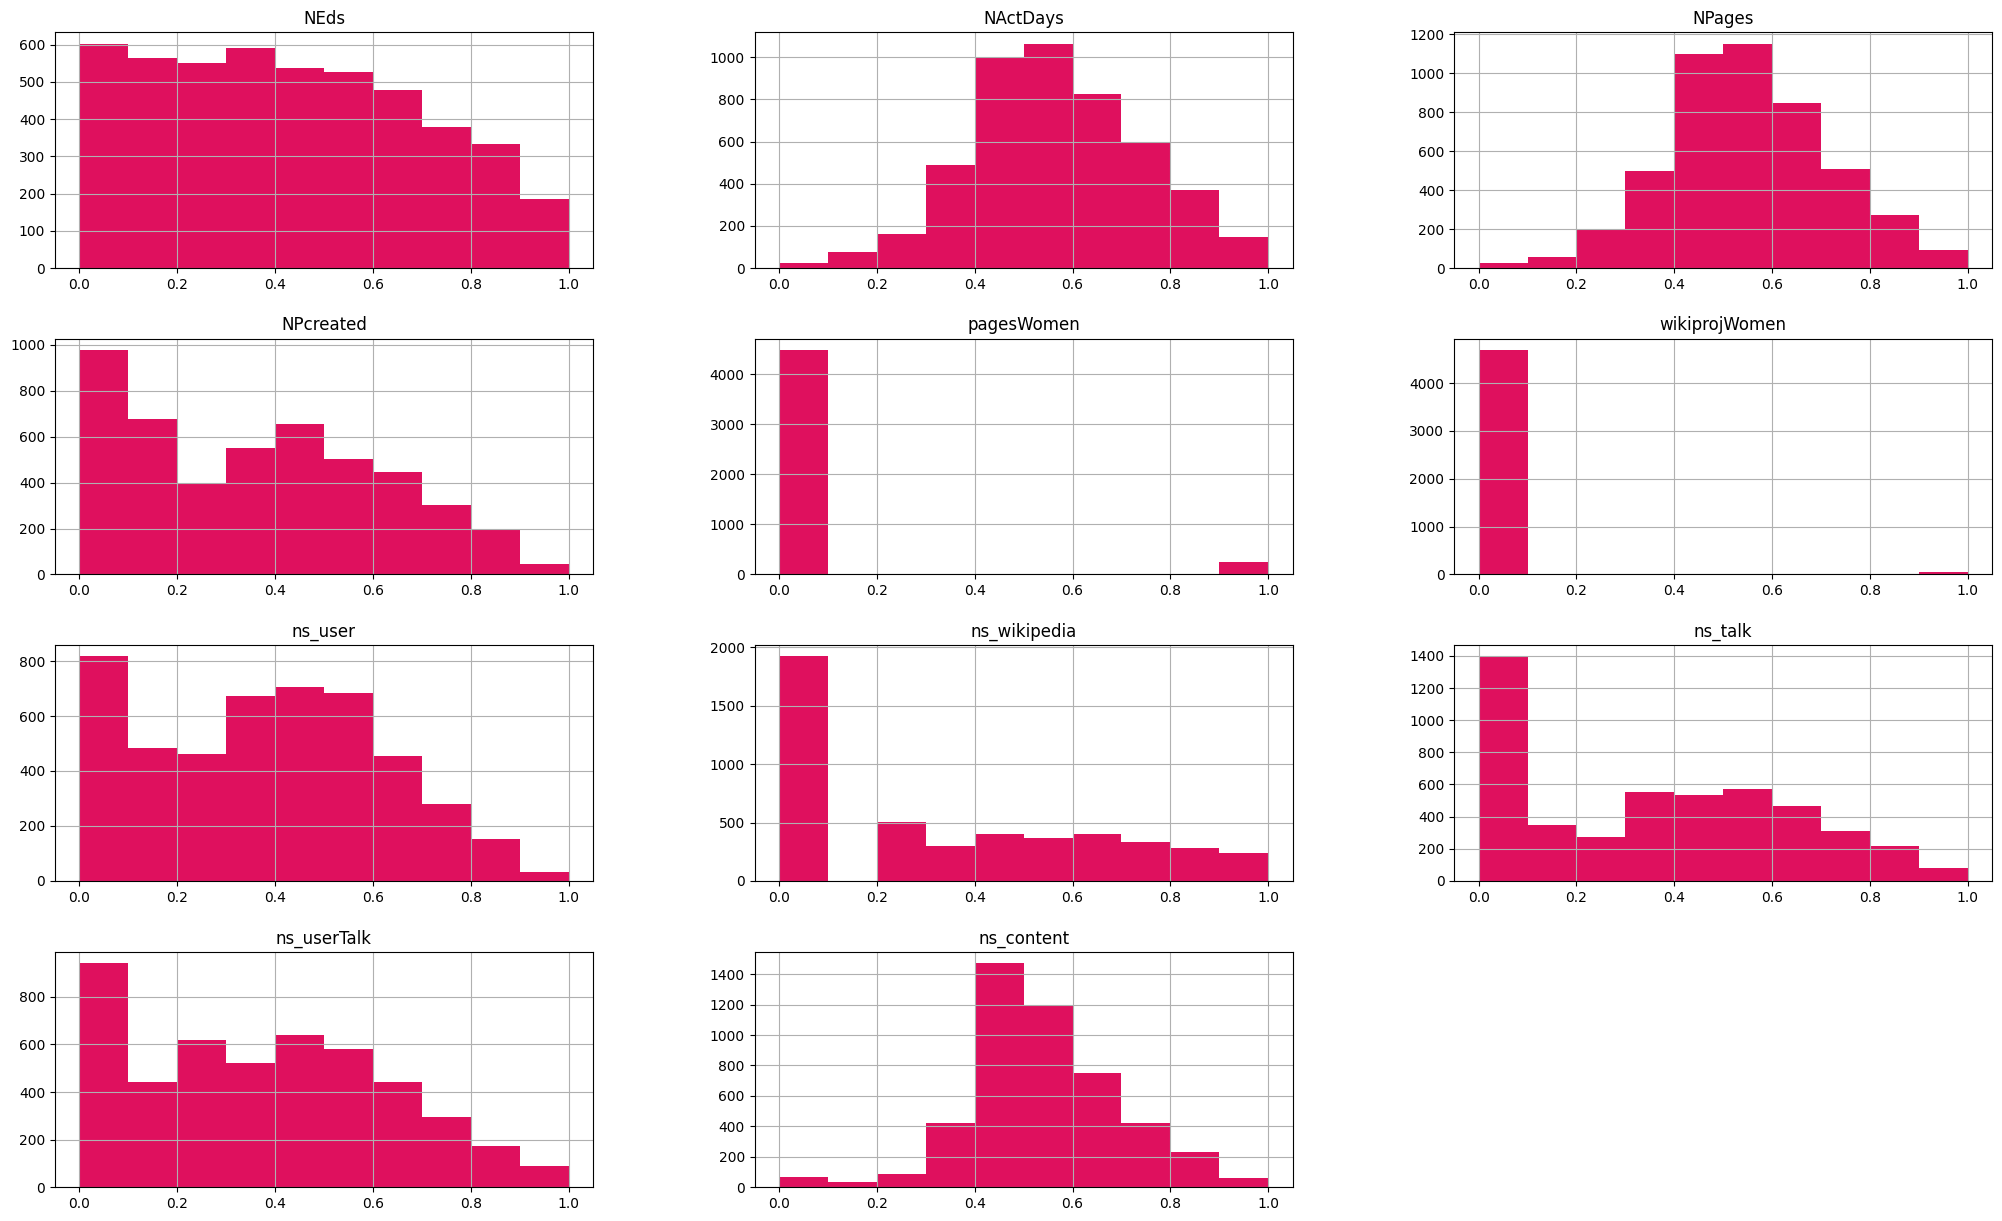

In [79]:
#Histogramas sin curva KDE
minmax_df.hist(figsize=(25,15),  color = '#DF105E')

### **CODIFICACIÓN ONE HOT A VARIABLE CATEGORICA**

**Se aplica ONE-HOT ENCODE para:**


*   Variables Categóricas Nominales: Es ideal para variables categóricas que no tienen un orden inherente, como colores, tipos de productos o ubicaciones1.

*   Evitar Interpretaciones Erróneas: Se utiliza para evitar que los algoritmos de aprendizaje automático interpreten erróneamente las relaciones entre categorías. Por ejemplo, si codificas ciudades como 0, 1, 2, 3, un algoritmo podría interpretar que la ciudad 3 es tres veces mayor que la ciudad 1, lo cual no es correcto2.

*   Dimensionalidad Manejable: Es más apropiada cuando el número de categorías únicas es relativamente pequeño, lo que permite una dimensionalidad manejable.

In [80]:
# CODIFICACIÓN:   Se transforman las variables CATEGORICAS en numeros para que
#                 los algoritmos puedan manejar esos valores (Ordinal, One-Hot
#                 Binaria)

# Codificación de las variables categóricas de texto
from sklearn.preprocessing import OneHotEncoder


# Se usa drop='first': Esto se hace para evitar la colinealidad, que ocurre
# cuando una de las columnas generadas puede ser expresada como una combinación
# lineal de las demás, al eliminar la primer categoria, se reduce la redundancia
# y se mejora la eficiencia del modelo

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(df[['C_api']])
onehot_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
onehot_df


,C_api_male,C_api_unknown
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
4741,1.0,0.0
4742,0.0,1.0
4743,0.0,1.0
4744,0.0,0.0


##**Se Concatenan los dataframes obtenidos: minmax_df (cuyas variables numéricas ya están transformadas y escaladas) y la codificacion (onehot_df)**

In [81]:
minmax_df.reset_index(drop=True, inplace=True)
onehot_df.reset_index(drop=True, inplace=True)

result = pd.concat([minmax_df, onehot_df], axis=1)
result

,NEds,NActDays,NPages,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,C_api_male,C_api_unknown
0,0.585348,0.528564,0.652106,0.378349,0.0,0.0,0.646108,0.761067,0.416198,0.697119,0.585614,1.0,0.0
1,0.789745,0.821281,0.756296,0.461574,0.0,0.0,0.657117,0.910757,0.811005,0.864134,0.709802,0.0,1.0
2,0.044959,0.452887,0.423911,0.000000,0.0,0.0,0.150805,0.000000,0.169480,0.295248,0.418544,1.0,0.0
3,0.229270,0.212538,0.538640,0.275287,0.0,0.0,0.445906,0.251642,0.257049,0.240927,0.461180,1.0,0.0
4,0.374325,0.463863,0.605401,0.000000,0.0,0.0,0.483683,0.636419,0.389453,0.573100,0.493709,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,0.454730,0.690795,0.612991,0.000000,0.0,0.0,0.260010,0.000000,0.257049,0.295248,0.563690,1.0,0.0
4742,0.700399,0.790512,0.747998,0.461574,0.0,0.0,0.453024,0.491306,0.544842,0.633991,0.669662,0.0,1.0
4743,0.272574,0.492121,0.489980,0.461574,0.0,0.0,0.305710,0.251642,0.000000,0.240927,0.492910,0.0,1.0
4744,0.669984,0.767584,0.695419,0.411873,0.0,0.0,0.569630,0.914646,0.643030,0.728125,0.620406,0.0,0.0


### **Parte 2. Ingeniería de características**



---



ANALISIS DE COMPONENTES PRINCIPALES PCA - PRINCIPAL COMPONENT ANALYSIS

*   Reducción de dimensionalidad: Se hace creando nuevas variables a partir de las ya existentes, de tal forma que conserven la información original proporcionada o al menos la mayoria.

*   Se aplica solo a DATOS NUMERICOS

*   Las nuevas variables que se crean en PCA se llaman COMPONENTES (PCi)

*   Los componentes principales no tienen un sentido fisico o sentido real, son una combinación lineal de variables

*   La varianza es muy sensible a la magnitud de los datos

*   Para evitar que algun dato tenga más varianza por efecto de su magnitud, el primer paso antes de calcular sus PC es escalar los datos para que media sea 0 y su varianza 1 en todas las dimensiones

In [85]:
# Considerando que gender es la avriable de salida

gender_y = df['gender']
gender_y

,gender
0,1
1,0
2,1
3,1
4,0
...,...
4741,1
4742,0
4743,2
4744,2


In [88]:
# Los predictores altamente correlacionados con la variable objetivo, pueden ser
# los mejores candidatos para el escalamiento

# Los valores de correlación oscilan entre -1 y 1, y cuanto más cerca estén de
# estos extremos, más fuerte será la correlación.

predictores_x = df[['NDays','NActDays','NEds','NPages','ns_content','ns_userTalk','ns_talk','weightIJ']]
predictores_x

,NDays,NActDays,NEds,NPages,ns_content,ns_userTalk,ns_talk,weightIJ
0,56,43,543,204,324,76,6,0.915024
1,2345,514,2764,722,1526,646,183,0.661673
2,2927,25,57,25,49,3,1,0.800528
3,67,5,104,66,78,2,2,1.027717
4,2798,27,184,125,112,24,5,0.997535
...,...,...,...,...,...,...,...,...
4741,2043,155,266,135,250,3,2,0.915024
4742,2130,381,1217,646,910,41,15,0.661673
4743,1793,33,122,43,111,2,0,1.027717
4744,2587,307,962,334,493,106,33,1.005227


In [89]:
# Para poder aplicar PCA primero necesitamos escalar los valores de X
# (los predictores númericos)


# Escalamiento de los valores de X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
predictores_x_scaled = scaler.fit_transform(predictores_x)
predictores_x_scaled_df = pd.DataFrame(predictores_x_scaled, columns=scaler.get_feature_names_out())
predictores_x_scaled_df

,NDays,NActDays,NEds,NPages,ns_content,ns_userTalk,ns_talk,weightIJ
0,-1.482514,-0.374771,-0.190821,-0.144697,-0.196427,-0.036849,-0.203904,-0.260880
1,0.230836,0.884603,0.094197,0.009702,0.000675,1.009083,0.617321,-1.038678
2,0.666472,-0.422900,-0.253189,-0.198051,-0.241521,-0.170802,-0.227102,-0.612387
3,-1.474280,-0.476377,-0.247157,-0.185831,-0.236766,-0.172637,-0.222463,0.085093
4,0.569913,-0.417553,-0.236891,-0.168245,-0.231191,-0.132268,-0.208544,-0.007567
...,...,...,...,...,...,...,...,...
4741,0.004785,-0.075302,-0.226368,-0.165264,-0.208562,-0.170802,-0.222463,-0.260880
4742,0.069905,0.528984,-0.104327,-0.012952,-0.100336,-0.101073,-0.162147,-1.038678
4743,-0.182344,-0.401510,-0.244848,-0.192686,-0.231355,-0.172637,-0.231742,0.085093
4744,0.411977,0.331120,-0.137051,-0.105949,-0.168715,0.018200,-0.078632,0.016047


In [90]:
#   Cremos la Matriz de Covarianza
#   Un número positivo de covarianza indica que dos variables tienden a aumentar
#   o disminuir juntas.
#   Un número negativo de covarianza indica que a medida que aumenta una
#   variable, la otra tiende a disminuir.

covM = predictores_x_scaled_df.cov()
covM

,NDays,NActDays,NEds,NPages,ns_content,ns_userTalk,ns_talk,weightIJ
NDays,1.000211,0.323428,0.180551,0.166547,0.174859,0.137033,0.174561,0.001911
NActDays,0.323428,1.000211,0.787569,0.660932,0.769465,0.519614,0.603334,0.125030
NEds,0.180551,0.787569,1.000211,0.902033,0.984173,0.616120,0.693452,0.105303
NPages,0.166547,0.660932,0.902033,1.000211,0.883290,0.568750,0.573365,0.081674
ns_content,0.174859,0.769465,0.984173,0.883290,1.000211,0.523074,0.643755,0.100284
ns_userTalk,0.137033,0.519614,0.616120,0.568750,0.523074,1.000211,0.712700,0.082285
ns_talk,0.174561,0.603334,0.693452,0.573365,0.643755,0.712700,1.000211,0.091404
weightIJ,0.001911,0.125030,0.105303,0.081674,0.100284,0.082285,0.091404,1.000211


In [91]:
#Valores propios = eigenvalores (son los coeficientes adjuntos a los vectores)
#Vectores propios = eigenvectores(direcciones de los ejes donde hay más varianza)
#de la matriz de covarianza

evals,evecs = np.linalg.eig(covM)
print("Valores propios:", evals, '\n')

Valores propios: [4.5904448  1.00248623 0.95940318 0.71902202 0.34274515 0.27544797
 0.1032287  0.00890794] 



In [92]:
#Calculamos el Porcentaje de Varianza que representa cada valor propio
#la suma de todos los valores debe dar 100%

print("Porcentaje de varianza", evals/sum(evals)*100)

Porcentaje de varianza [57.36846966 12.52843753 11.99001293  8.98588146  4.28341164  3.44237411
  1.29008692  0.11132575]


In [93]:
#Cada fila es un vector propio (direcciones de los ejes donde hay más varianza)
print("Vectores Propios:")
print(evecs.T,'\n')

Vectores Propios:
[[ 1.30035827e-01  3.95104330e-01  4.50051541e-01  4.14752946e-01
   4.35488027e-01  3.44286737e-01  3.73995069e-01  6.60406399e-02]
 [ 5.93104788e-01  8.02387510e-02 -2.77541018e-02 -1.89691028e-02
  -2.24049679e-02 -4.83959818e-02 -2.49565748e-02 -7.98242665e-01]
 [ 7.57494077e-01  1.50194149e-01 -9.86926122e-02 -1.23558267e-01
  -9.29547113e-02 -1.05883016e-01 -6.56826420e-02  5.95375145e-01]
 [ 5.43936988e-02 -1.47780331e-01 -2.27338591e-01 -2.93402692e-01
  -3.41882000e-01  6.76401924e-01  5.12818033e-01 -7.00895045e-03]
 [-2.02774834e-01  6.82978151e-01 -6.90503443e-02 -4.95505681e-01
  -2.73853767e-02 -3.47118114e-01  3.43028028e-01 -5.67469002e-02]
 [ 1.03151800e-01 -5.18323046e-01  7.50285395e-02  2.97943681e-02
   1.60088679e-01 -5.02463248e-01  6.59833690e-01  2.65657839e-02]
 [-5.27656960e-02  2.39592935e-01 -3.78502985e-01  6.90612445e-01
  -5.00440321e-01 -1.73702372e-01  1.97453583e-01  3.11232401e-05]
 [-4.39291017e-03  2.31147868e-02 -7.62626063e-01  

In [94]:
# Aplicamos PCA para proyectar los datos en el nuevo espacio de vectores
# Aplicamos PCA para reducir la dimensionalidad de X, se debe hacer sobre
# los predictores escalados
# El PCA calcula los componentes principales a partir de las variables orig.

from sklearn.decomposition import PCA
pca = PCA()
predictores_x_pca = pca.fit_transform(predictores_x_scaled)
predictores_x_pca = pd.DataFrame(predictores_x_pca)
predictores_x_pca

,0,1,2,3,4,5,6,7
0,-0.678463,0.681798,-1.262341,0.000073,0.092560,-0.131703,0.025161,-0.004158
1,0.935933,-0.969951,-0.468634,0.863736,0.466457,-0.554526,0.117053,-0.041792
2,-0.565877,-0.880317,0.181642,0.069288,-0.285606,0.144088,-0.071760,0.002495
3,-0.808361,0.950955,-1.035392,-0.049586,0.068008,-0.024926,0.033419,-0.005231
4,-0.491974,-0.337106,0.457847,0.078606,-0.319883,0.144072,-0.059148,0.002163
...,...,...,...,...,...,...,...,...
4741,-0.449611,-0.232949,-0.068163,-0.045142,0.048613,-0.083669,0.043361,-0.011143
4742,-0.041961,-0.927351,-0.443425,-0.156788,0.401884,-0.375047,0.189316,-0.015166
4743,-0.613700,0.178518,-0.044788,0.004501,-0.142925,0.064247,-0.026962,-0.002487
4744,-0.016780,-0.268780,0.416893,0.065273,0.174990,-0.230183,0.102046,0.002520


In [95]:
print("Valores propios:", list(np.round(pca.explained_variance_,decimals=8)))

Valores propios: [4.5904448, 1.00248623, 0.95940318, 0.71902202, 0.34274515, 0.27544797, 0.1032287, 0.00890794]


In [96]:
print("Porcentaje de varianza:", pca.explained_variance_ratio_*100)

Porcentaje de varianza: [57.36846966 12.52843753 11.99001293  8.98588146  4.28341164  3.44237411
  1.29008692  0.11132575]


In [97]:
#Los signos de los valores pudiera cambiar si lo comparamos cuando realizamos
#el calculo manual, el cambio de los signos no afecta la interpretacion del PCA
#ni cambia la escencia de los resultados
print("Vectores propios:")
print(pca.components_)

Vectores propios:
[[ 1.30035827e-01  3.95104330e-01  4.50051541e-01  4.14752946e-01
   4.35488027e-01  3.44286737e-01  3.73995069e-01  6.60406399e-02]
 [-5.93104788e-01 -8.02387510e-02  2.77541018e-02  1.89691028e-02
   2.24049679e-02  4.83959818e-02  2.49565748e-02  7.98242665e-01]
 [ 7.57494077e-01  1.50194149e-01 -9.86926122e-02 -1.23558267e-01
  -9.29547113e-02 -1.05883016e-01 -6.56826420e-02  5.95375145e-01]
 [ 5.43936988e-02 -1.47780331e-01 -2.27338591e-01 -2.93402692e-01
  -3.41882000e-01  6.76401924e-01  5.12818033e-01 -7.00895045e-03]
 [-2.02774834e-01  6.82978151e-01 -6.90503443e-02 -4.95505681e-01
  -2.73853767e-02 -3.47118114e-01  3.43028028e-01 -5.67469002e-02]
 [ 1.03151800e-01 -5.18323046e-01  7.50285395e-02  2.97943681e-02
   1.60088679e-01 -5.02463248e-01  6.59833690e-01  2.65657839e-02]
 [-5.27656960e-02  2.39592935e-01 -3.78502985e-01  6.90612445e-01
  -5.00440321e-01 -1.73702372e-01  1.97453583e-01  3.11232401e-05]
 [ 4.39291017e-03 -2.31147868e-02  7.62626063e-01 -

In [99]:
varianza_acu = np.cumsum(pca.explained_variance_ratio_)
print("Varianza Acumulada:", varianza_acu)

#El primer valor explica el primer porcentaje de varianza 57.36%
#La suma del primer + el segundo porcentaje explican el n% de la varianza
#La suma del segundo + el tercer porcentaje explican el n% de la varianza asi
#hasta llegar al 100% de la varianza

Varianza Acumulada: [0.5736847  0.69896907 0.8188692  0.90872802 0.95156213 0.98598587
 0.99888674 1.        ]


**El número mínimo de componentes principales son 4 ya que explican más del 90% de la varianza**

In [100]:
# Después de calcular todos los componentes, debemos decidir cuántos de ellos
# queremos retener por lo que Ajustamos el numero de componentes a 4 que es el
# numero minimo de componentes principales que explican más del 90% de la
# varianza

num_components = 4
pc_df = pd.DataFrame(abs(pca.components_[:num_components]), columns= predictores_x.columns, index=['Principal component {}'.format(i) for i in range(1, num_components + 1)])
pc_df

,NDays,NActDays,NEds,NPages,ns_content,ns_userTalk,ns_talk,weightIJ
Principal component 1,0.130036,0.395104,0.450052,0.414753,0.435488,0.344287,0.373995,0.066041
Principal component 2,0.593105,0.080239,0.027754,0.018969,0.022405,0.048396,0.024957,0.798243
Principal component 3,0.757494,0.150194,0.098693,0.123558,0.092955,0.105883,0.065683,0.595375
Principal component 4,0.054394,0.147780,0.227339,0.293403,0.341882,0.676402,0.512818,0.007009


La matriz anterior es una matriz de cargas, donde cada fila representa un componente principal y cada columna representa una variable original. Las cargas indican la contribución de cada variable al componente principal. Las variables con las mayores cargas absolutas (mayor magnitud) son las más importantes en ese componente.

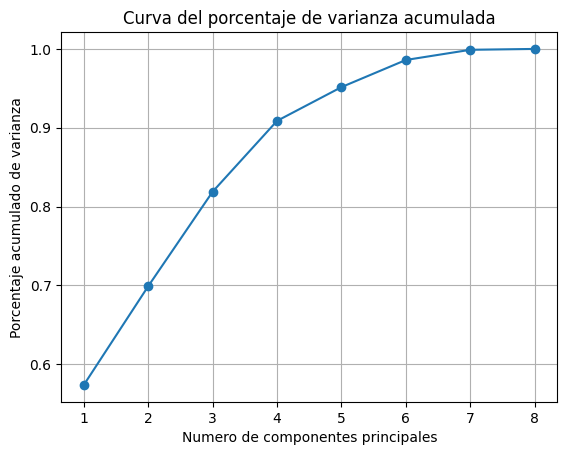

In [102]:
#Graficamos la curva de varianza acumulada, como se puede observar
#los primeros 4 puntos explican más del 90 % de la varianza
plt.plot(range(1,9), varianza_acu, marker='o')
plt.xlabel('Numero de componentes principales')
plt.ylabel('Porcentaje acumulado de varianza')
plt.title('Curva del porcentaje de varianza acumulada')
plt.grid(True)
plt.show()

### **Parte 3. Entrenando y evaluando el modelo de RL**



---



### **APLICANDO REGRESION LOGISTICA MULTIMODAL**

Ya que se tienen más de 2 tipos de clases


In [ ]:
y = df['genere']

In [109]:
#Eliminamos del Dataframe original la variable de salida dejando todas las demas
X = df.drop(['gender'], axis=1)
y = df['gender']

*   Usamos stratify=X['C_api'] ya que si observamos la grafica de barras para la variable categorica C_api tenemos que hay una desigualdad entre los valores, por lo que al dividir nuestro conjunto de datos en bloques de entrenamiento y pruebas, conservemos el mismo porcentaje del conjunto original



In [112]:
# Se divide el conjunto en entrenamiento y prueba (80:20)
from sklearn.model_selection import train_test_split
#Librerias para canalización
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, random_state=1, stratify=X['C_api'])

*   Xtrain: Tiene el 80% de los datos para entrenamiento (predictores)
*   Xtest: Tiene el 20% de los datos para prueba (predictores)
*   ytrain: Tiene el 80% de los datos de la variable de salida
*   ytest: Tiene el 20% de los datos de la variable de salida

In [113]:
#Cuando solo se aplica un transformador no es necesario crear PIPELINES
preprocessing = ColumnTransformer([('num', MinMaxScaler(), make_column_selector(dtype_include=np.number)),
                                   ('cat', OneHotEncoder(), make_column_selector(dtype_include=object))])


In [114]:
# Para que se visualicen los cambios que
# produce el pipeline "preprocessing" creado anteriormente

Xtrain_prepared = preprocessing.fit_transform(Xtrain)
Xtrain_prepared_df = pd.DataFrame(Xtrain_prepared, columns=preprocessing.get_feature_names_out(), index=Xtrain.index)
Xtrain_prepared_df

,num__C_man,num__E_NEds,num__E_Bpag,num__firstDay,num__lastDay,num__NEds,num__NDays,num__NActDays,num__NPages,num__NPcreated,...,num__ns_user,num__ns_wikipedia,num__ns_talk,num__ns_userTalk,num__ns_content,num__weightIJ,num__NIJ,cat__C_api_female,cat__C_api_male,cat__C_api_unknown
2594,1.0,0.666667,0.000000,0.201545,0.998430,0.001704,0.844802,0.037220,0.002539,0.000000,...,0.003569,0.000369,0.000425,0.000486,0.002146,0.545358,0.269438,0.0,0.0,1.0
3500,0.0,0.000000,0.666667,0.465538,0.010056,0.000202,0.220456,0.006247,0.000510,0.000149,...,0.003059,0.000041,0.000638,0.000162,0.000511,0.267403,0.282525,0.0,1.0,0.0
2575,1.0,1.000000,0.333333,0.467433,0.611526,0.023521,0.447457,0.179854,0.011217,0.004629,...,0.027275,0.004920,0.061437,0.018462,0.023428,0.171840,0.138568,0.0,0.0,1.0
3360,1.0,1.000000,0.666667,0.404416,0.996291,0.180335,0.598728,0.421395,0.101189,0.002090,...,0.067805,0.155215,0.195578,0.286559,0.145092,0.408281,0.400308,0.0,1.0,0.0
264,0.0,0.333333,0.666667,0.931034,0.798152,0.000771,0.011406,0.007028,0.000266,0.000299,...,0.032883,0.000041,0.000850,0.000000,0.000286,0.423759,0.418784,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210,1.0,0.333333,1.000000,0.268613,0.998392,0.000803,0.767577,0.014576,0.000744,0.000149,...,0.010961,0.000164,0.000850,0.000162,0.000891,0.125520,0.150885,0.0,1.0,0.0
4736,0.5,0.000000,1.000000,0.663063,0.008131,0.000118,0.023186,0.001822,0.000382,0.000149,...,0.000510,0.000041,0.000213,0.000486,0.000493,0.000000,0.000000,1.0,0.0,0.0
937,0.0,0.000000,1.000000,0.265948,0.196939,0.000163,0.473074,0.009110,0.000382,0.000000,...,0.007647,0.000000,0.000850,0.000000,0.000320,0.000000,0.000000,0.0,0.0,1.0
828,1.0,0.000000,0.333333,0.667021,0.988742,0.000118,0.327786,0.005466,0.000244,0.000448,...,0.001020,0.000000,0.001276,0.000000,0.000485,0.444015,0.598152,0.0,0.0,1.0


In [116]:
# Se crea el pipeline para la predicción, que incluye el de procesamiento creado
# anteriormente y la regresión logistica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics      import mean_squared_error, r2_score

lr_model = make_pipeline(preprocessing, LogisticRegression())
lr_model.fit(Xtrain, ytrain)
predictions = lr_model.predict(Xtest)

print('The Root Mean Square Error (RMSE) is:', mean_squared_error(ytest, predictions, squared=False))
print('The Root Mean Square Error (RMSE) is:', np.sqrt(mean_squared_error(ytest, predictions)))
print('The R square (R2) is:', r2_score(ytest, predictions))

# La raíz del Error Cuadrático Medio (RMSE) es una métrica que nos indica qué tan lejos
# están nuestros valores predichos de nuestros valores observados en un modelo
# Cuanto mayor sea el RMSE, mayor será la discrepancia entre los valores
# predichos y observados, lo que indica un peor ajuste del modelo a los datos

The Root Mean Square Error (RMSE) is: 0.03244428422615251
The Root Mean Square Error (RMSE) is: 0.03244428422615251
The R square (R2) is: 0.996916945764208


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### **INTERPRETACIÓN**


*   **Root Mean Square Error (RMSE) = 0.03244428422615251**


---


Un RMSE de 0.032 sugiere que, en promedio, las predicciones del modelo están muy cerca de los valores reales, lo cual indica un buen desempeño del modelo. Cuanto más bajo sea el RMSE, mejor es el modelo.

*   **R square (R²) = 0.996916945764208


---

Un R² de 0.997 sugiere que el 99.7% de la variabilidad en los datos de salida puede ser explicada por las variables de entrada del modelo. Un valor de R² cercano a 1 indica un ajuste casi perfecto.